In [1]:
import pandas as pd
from Main import settings, features, pf_set
import time
import pickle
from pandas.tseries.offsets import DateOffset
import Prepare_Data
import data_run_files
import return_prediction_functions
from return_prediction_functions import rff
import numpy as np
from pandas.tseries.offsets import MonthEnd
from sklearn.linear_model import Ridge
import General_Functions
import pickle
import Estimate_Covariance_Matrix
import os
import prepare_portfolio_data
import portfolio_choice_functions
import scipy.linalg
import functools
import importlib
sqrtm_cpp = importlib.import_module("sqrtm_cpp")
start_date = pd.to_datetime('1952-12-31')

#Relevante paths
output_path = "./data_fifty/"
pickle_file_path = "./data_fifty/model_1.pkl"
wealth_path = "./data_fifty/wealth.csv"
barra_file_path = "./data_fifty/barra_cov.pkl"
output_path_market_returns = "data_fifty/market_returns_test.csv"

risk_free_path = "./data_fifty/risk_free_test.csv" 
output_data_ret_csv = "./data_fifty/data_ret.csv"  
output_data_ret_ld1_csv = "./data_fifty/data_ret_ld1.csv"

file_path_cluster_labels = "Data/Cluster Labels.csv"
file_path_factor_details = "Data/Factor Details.xlsx"

risk_free = data_run_files.process_risk_free_rate(risk_free_path, start_date)
daily_path = "./data_fifty/daily.csv"
chars_path = "./data_fifty/chars_behandlet.parquet"


Features list length: 154
Filtrering udført. Antal rækker efter filtrering: 841
Fil gemt som ./data_test/risk_free_test.csv


In [1]:
import pandas as pd
from Main import settings, features, pf_set
import time
import pickle
from pandas.tseries.offsets import DateOffset
import Prepare_Data
import data_run_files
import return_prediction_functions
from return_prediction_functions import rff
import numpy as np
from pandas.tseries.offsets import MonthEnd
from sklearn.linear_model import Ridge
import General_Functions
import pickle
import Estimate_Covariance_Matrix
import os
import prepare_portfolio_data
import portfolio_choice_functions
import scipy.linalg
import matplotlib.pyplot as plt
import re
import pickle
start_date = pd.to_datetime('1952-12-31')

file_path_cluster_labels = "Data/Cluster Labels.csv"
file_path_factor_details = "Data/Factor Details.xlsx"

folder_name = "much_more_data"

output_path = os.path.join(".", folder_name, "")
market_path = os.path.join(".", folder_name, "market_returns_test.csv")
pickle_file_path = os.path.join(".", folder_name, "model_1.pkl")
wealth_path = os.path.join(".", folder_name, "wealth.csv")
barra_file_path = os.path.join(".", folder_name, "barra_cov.pkl")
output_path_market_returns = os.path.join(folder_name, "market_returns_test.csv")

risk_free_path = os.path.join(".", folder_name, "risk_free_test.csv")
#risk_free = data_run_files.process_risk_free_rate(risk_free_path, start_date, output_path = risk_free_path)
risk_free_path = "./data_fifty/risk_free_test.csv" 
risk_free = data_run_files.process_risk_free_rate(risk_free_path, start_date)
output_data_ret_csv = os.path.join(".", folder_name, "data_ret.csv")
output_data_ret_ld1_csv = os.path.join(".", folder_name, "data_ret_ld1.csv")
daily_path = os.path.join(".", folder_name, "daily.csv")
chars_path = os.path.join(".", folder_name, "chars_behandlet.parquet")
file_path_world_ret = os.path.join(".", folder_name, "world_ret_test.csv")
daily_file_path = os.path.join(".", folder_name, "usa_dsf_test.parquet")
output_path_usa = os.path.join(".", folder_name, "usa_test.parquet")
output_path_chars_behandlet =  os.path.join(".", folder_name, "chars_behandlet.parquet")
output_path_daily = os.path.join(".", folder_name, "daily.csv")
file_path_cluster_labels = os.path.join("Data", "Cluster Labels.csv")
file_path_factor_details = os.path.join("Data", "Factor Details.xlsx")


wealth = pd.read_csv(wealth_path)
wealth['eom'] = pd.to_datetime(wealth['eom'])
data_ret = pd.read_csv(output_data_ret_csv)
data_ret_ld1 = pd.read_csv(output_data_ret_ld1_csv)
data_ret['eom'] = pd.to_datetime(data_ret['eom'])
data_ret_ld1['eom'] = pd.to_datetime(data_ret_ld1['eom'])
data_ret_ld1['eom_ret'] = pd.to_datetime(data_ret_ld1['eom_ret'])
daily = pd.read_csv(daily_path, parse_dates=["date", "eom"])
chars = pd.read_parquet(chars_path)
chars_demean = pd.read_parquet(chars_path)


with open(barra_file_path, "rb") as file:
    barra_cov = pickle.load(file)

chars_path_demean = os.path.join(".", folder_name, "chars_demean_standarliseret_new.parquet")
chars_demean = pd.read_parquet(chars_path_demean)

output_folder = r"C:\Users\jonas\OneDrive\CBS\Kandidat - CBS\Speciale\Resultater Python"

# Hvis wealth skal æændres, så ændrer vi bare wealth_end
wealth_end_new = 1000000000 #1e9 er vores base case
end = settings["split"]["test_end"]
market_test = Prepare_Data.load_and_filter_market_returns_test(market_path)
wealth = Prepare_Data.wealth_func(wealth_end_new, end, market_test, risk_free)


market_path = os.path.join(".", folder_name, "market_returns_test.csv")
market = Prepare_Data.load_and_filter_market_returns_test(market_path)
market

Features list length: 154
Filtrering udført. Antal rækker efter filtrering: 841
Fil gemt som ./data_test/risk_free_test.csv
Filen er indlæst og filtreret succesfuldt.
Filen er indlæst og filtreret succesfuldt.


eom  mkt_vw_exc
0    1952-12-31    0.029113
1    1953-01-31   -0.003177
2    1953-02-28   -0.003027
3    1953-03-31   -0.014660
4    1953-04-30   -0.029152
..          ...         ...
836  2022-08-31   -0.038088
837  2022-09-30   -0.093270
838  2022-10-31    0.079050
839  2022-11-30    0.048429
840  2022-12-31   -0.063079

[841 rows x 2 columns]

# Indlæser wealth, chars, daily, data_ret og data_ret_ld1

In [2]:
wealth = pd.read_csv(wealth_path)
wealth['eom'] = pd.to_datetime(wealth['eom'])
data_ret = pd.read_csv(output_data_ret_csv)
data_ret_ld1 = pd.read_csv(output_data_ret_ld1_csv)
data_ret['eom'] = pd.to_datetime(data_ret['eom'])
data_ret_ld1['eom'] = pd.to_datetime(data_ret_ld1['eom'])
data_ret_ld1['eom_ret'] = pd.to_datetime(data_ret_ld1['eom_ret'])
daily = pd.read_csv(daily_path, parse_dates=["date", "eom"])
chars = pd.read_parquet(chars_path)

Disse er checket og se ser korrekte ud wuhu :D

In [3]:
data_ret

id        eom   ret_ld1   ret_ld2   ret_ld3   ret_ld4   ret_ld5  \
0      10104 1986-04-30 -0.064934  0.031988 -0.369114  0.059902 -0.141147   
1      10104 1986-05-31  0.031988 -0.369114  0.059902 -0.141147  0.258949   
2      10104 1986-06-30 -0.369114  0.059902 -0.141147  0.258949  0.190520   
3      10104 1986-07-31  0.059902 -0.141147  0.258949  0.190520 -0.039651   
4      10104 1986-08-31 -0.141147  0.258949  0.190520 -0.039651  0.297054   
...      ...        ...       ...       ...       ...       ...       ...   
90698  92655 2022-07-31 -0.044328 -0.026268  0.096893 -0.016168 -0.032461   
90699  92655 2022-08-31 -0.026268  0.096893 -0.016168 -0.032461  0.000000   
90700  92655 2022-09-30  0.096893 -0.016168 -0.032461  0.000000  0.000000   
90701  92655 2022-10-31 -0.016168 -0.032461  0.000000  0.000000  0.000000   
90702  92655 2022-11-30 -0.032461  0.000000  0.000000  0.000000  0.000000   

        ret_ld6   ret_ld7   ret_ld8   ret_ld9  ret_ld10  ret_ld11  ret_ld12  
0      0.258949  0.190520 -0.039651  0.297054  0.421617  0.137845  0.063897  
1      0.190520 -0.039651  0.297054  0.421617  0.137845  0.063897  0.155814  
2     -0.039651  0.297054  0.421617  0.137845  0.063897  0.155814 -0.188517  
3      0.297054  0.421617  0.137845  0.063897  0.155814 -0.188517  0.018414  
4      0.421617  0.137845  0.063897  0.155814 -0.188517  0.018414  0.171080  
...         ...       ...       ...       ...       ...       ...       ...  
90698  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
90699  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
90700  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
90701  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
90702  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  

[90703 rows x 14 columns]

## Hent Predictions :D

### Indlæsning af Pickle fil (predictions)

In [4]:
with open(pickle_file_path, "rb") as file:
    model_1 = pickle.load(file)


# Barra COV

Just a quick check

In [5]:
with open(barra_file_path, "rb") as file:
    barra_cov = pickle.load(file)

In [6]:
print(barra_cov['2022-11-30']['ivol_vec'])

id
10104    0.004043
10107    0.002393
10138    0.002996
10696    0.003696
11308    0.001280
           ...   
87299    0.004106
87432    0.003534
87447    0.003139
87717    0.003166
92655    0.002555
Name: res_vol, Length: 180, dtype: float64


# Prepare Portfolio Data - tilføj return predictions, lambda list og datoer

In [7]:
chars = prepare_portfolio_data.add_return_predictions(chars,settings, output_path)

In [8]:
print(chars.shape) 
print(chars[['id', 'eom','pred_ld1']])

(73216, 131)
          id        eom  pred_ld1
0      10104 1986-12-31       NaN
1      10104 1987-01-31       NaN
2      10104 1987-02-28       NaN
3      10104 1987-03-31       NaN
4      10104 1987-04-30       NaN
...      ...        ...       ...
73211  92655 2022-07-31  0.010957
73212  92655 2022-08-31  0.009506
73213  92655 2022-09-30  0.010641
73214  92655 2022-10-31  0.010774
73215  92655 2022-11-30  0.011608

[73216 rows x 3 columns]


In [9]:
missing_rows = chars[chars["pred_ld1"].isna()]

print("De første rækker med NaN i pred_ld1:")
print(missing_rows[['eom', 'pred_ld1']].head())

print("Antal NaN i pred_ld1:", len(missing_rows))

dates_with_missing = missing_rows['eom'].unique()
print("Datoer (eom) med NaN i pred_ld1:")
print(dates_with_missing)

De første rækker med NaN i pred_ld1:
         eom  pred_ld1
0 1986-12-31       NaN
1 1987-01-31       NaN
2 1987-02-28       NaN
3 1987-03-31       NaN
4 1987-04-30       NaN
Antal NaN i pred_ld1: 26095
Datoer (eom) med NaN i pred_ld1:
<DatetimeArray>
['1986-12-31 00:00:00', '1987-01-31 00:00:00', '1987-02-28 00:00:00',
 '1987-03-31 00:00:00', '1987-04-30 00:00:00', '1987-05-31 00:00:00',
 '1987-06-30 00:00:00', '1987-07-31 00:00:00', '1987-08-31 00:00:00',
 '1987-09-30 00:00:00',
 ...
 '2002-06-30 00:00:00', '2002-07-31 00:00:00', '2002-08-31 00:00:00',
 '2002-09-30 00:00:00', '2002-10-31 00:00:00', '2002-11-30 00:00:00',
 '2002-12-31 00:00:00', '2003-01-31 00:00:00', '2003-02-28 00:00:00',
 '2005-02-28 00:00:00']
Length: 313, dtype: datetime64[ns]


In [2]:
lambda_list = prepare_portfolio_data.create_lambda_list(chars_demean)

In [3]:
first_cov_date, hp_years, start_oos = prepare_portfolio_data.define_important_dates(barra_cov, settings)
date_ranges = prepare_portfolio_data.create_date_ranges(settings, first_cov_date, start_oos, hp_years)
dates_m1 = date_ranges["dates_m1"]
dates_m2 = date_ranges["dates_m2"]
dates_oos = date_ranges["dates_oos"]
dates_hp = date_ranges["dates_hp"]

# Base cases

In [13]:
print(wealth['eom'])
print(dates_oos)
print(pf_set)

0     1952-11-30
1     1952-12-31
2     1953-01-31
3     1953-02-28
4     1953-03-31
         ...    
837   2022-08-31
838   2022-09-30
839   2022-10-31
840   2022-11-30
841   2022-12-31
Name: eom, Length: 842, dtype: datetime64[ns]
DatetimeIndex(['2010-12-31', '2011-01-31', '2011-02-28', '2011-03-31',
               '2011-04-30', '2011-05-31', '2011-06-30', '2011-07-31',
               '2011-08-31', '2011-09-30',
               ...
               '2022-02-28', '2022-03-31', '2022-04-30', '2022-05-31',
               '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30',
               '2022-10-31', '2022-11-30'],
              dtype='datetime64[ns]', length=144, freq='ME')
{'wealth': 10000000000.0, 'gamma_rel': 10, 'mu': 0.007, 'lb_hor': 11}


In [14]:
ew = portfolio_choice_functions.ew_implement(data=chars, wealth=wealth, dates=dates_oos, pf_set=pf_set)
mkt = portfolio_choice_functions.mkt_implement(data=chars, wealth=wealth, dates=dates_oos, pf_set= pf_set)
rw = portfolio_choice_functions.rw_implement(data=chars, wealth=wealth, dates=dates_oos, pf_set= pf_set)
mv = portfolio_choice_functions.mv_implement(data=chars, cov_list=barra_cov ,wealth=wealth, dates=dates_oos, pf_set= pf_set)
factor_ml = portfolio_choice_functions.factor_ml_implement(data = chars, wealth = wealth, dates= dates_oos, n_pfs=settings["factor_ml"]["n_pfs"]
, gam=pf_set['gamma_rel'])
tpf = portfolio_choice_functions.tpf_implement(data=chars, cov_list=barra_cov, wealth=wealth, dates=dates_oos, gam=pf_set["gamma_rel"])

# STATIC ML og performance for bm

In [15]:
General_Functions

<module 'General_Functions' from 'C:\\Users\\jonas\\PycharmProjects\\Master\\General_Functions.py'>

In [4]:
def create_lambda(x, ids):
    return np.diag([x[i] for i in ids])


In [5]:
import itertools


def static_val_fun(data, dates, cov_list, lambda_list, wealth, cov_type, gamma_rel, k=None, g=None, u=None, hps=None):
    """
    Beregner de statiske vægte for de angivne datoer.
    Parametre:
      - data: DataFrame med portefølje-data.
      - dates: Liste af datoer (som datetime-objekter).
      - cov_list: Dictionary med covariance-data pr. dato.
      - lambda_list: Dictionary med lambda-data pr. dato.
      - wealth: DataFrame med wealth-information (skal indeholde 'eom' og 'wealth', evt. 'mu_ld1').
      - cov_type: Type til justering af covariance.
      - gamma_rel: Skalar til vægtning.
      - k, g, u: Parametre, kan angives direkte.
      - hps: DataFrame med hyperparametre; hvis angivet, opdateres k, g og u for hver dato.
    """

    static_weights = General_Functions.initial_weights_new(data, w_type="vw")

    
    static_weights = static_weights.merge(data[['id', 'eom', 'tr_ld1', 'pred_ld1']], on=['id', 'eom'], how='left')
    static_weights = static_weights.merge(wealth[['eom', 'mu_ld1']], on='eom', how='left')
    
    for d in dates:

        if hps is not None:
        
            hp_candidates = hps[hps['eom_ret'].dt.year < d.year]
            if not hp_candidates.empty:
                hp = hp_candidates.loc[hp_candidates['eom_ret'].idxmax()]
                g = hp['g']
                u = hp['u']
                k = hp['k']
        
        wealth_t_series = wealth.loc[wealth['eom'] == d, 'wealth']
        if wealth_t_series.empty:
            continue  
        wealth_t = wealth_t_series.iloc[0]
        
        mask = static_weights['eom'] == d
        ids = static_weights.loc[mask, 'id'].tolist()

        
        sigma_gam = General_Functions.create_cov(cov_list[d], ids=ids) * gamma_rel
        sigma_gam = General_Functions.sigma_gam_adj(sigma_gam, g=g, cov_type=cov_type)
        
        lambda_val = create_lambda(lambda_list[d], ids=ids)
        lambda_val = lambda_val * k
        
        pred_ld1 = static_weights.loc[mask, 'pred_ld1'].values
        w_start = static_weights.loc[mask, 'w_start'].values

        
        rhs = (pred_ld1 * u) + wealth_t * (lambda_val.dot(w_start))
        A = sigma_gam + wealth_t * lambda_val
        w_new = np.linalg.solve(A, rhs)
        static_weights.loc[mask, 'w'] = w_new
        
        try:
            current_index = list(dates).index(d)
            next_month = dates[current_index + 1]
        except IndexError:
            continue
        
        temp = static_weights.loc[mask, ['id', 'w', 'tr_ld1', 'mu_ld1']].copy()
        temp['eom'] = next_month
        temp['w_opt_lag1'] = temp['w'] * (1 + temp['tr_ld1']) / (1 + temp['mu_ld1'])
        
        static_weights = static_weights.merge(temp[['id', 'eom', 'w_opt_lag1']], on=['id', 'eom'], how='left')
        
        next_mask = static_weights['eom'] == next_month
        static_weights.loc[next_mask, 'w_start'] = static_weights.loc[next_mask, 'w_opt_lag1']
        static_weights.loc[next_mask & static_weights['w_start'].isna(), 'w_start'] = 0
        
        static_weights.drop(columns='w_opt_lag1', inplace=True)
        
    return static_weights


In [6]:
def static_implement(data_tc, cov_list, lambda_list, rf, wealth, mu, gamma_rel,
                     dates_full, dates_oos, dates_hp, hp_years,
                     k_vec, u_vec, g_vec, cov_type, validation=None, seed=None):
    """
    Fuldt statisk implementering.
    Parametre:
      - data_tc: DataFrame med tidsserie-data.
      - cov_list, lambda_list: Ordbøger med covariance- og lambda-data.
      - rf, wealth, mu, gamma_rel: Diverse parametre.
      - dates_full, dates_oos, dates_hp: Lister af datoer (skal være datetime-objekter).
      - hp_years: Årstal for HP-valg.
      - k_vec, u_vec, g_vec: Vektorer med hyperparametre.
      - cov_type: Typen af covariance.
      - validation: Valideringsresultater (kan være None, hvorefter de udregnes).
      - seed: Til eventuel reproducibilitet.
    """
    cov_list = {pd.to_datetime(key): value for key, value in cov_list.items()}
    lambda_list = {pd.to_datetime(key): value for key, value in lambda_list.items()}

    static_hps = pd.DataFrame(list(itertools.product(k_vec, u_vec, g_vec)), columns=['k', 'u', 'g'])

    data_rel = data_tc[(data_tc['valid'] == True) & (data_tc['eom'].isin(dates_hp))][['id', 'eom', 'me', 'tr_ld1', 'pred_ld1']]
    data_rel = data_rel.sort_values(by=['id', 'eom'])
    
    if validation is None:
        validation_list = []
        for i in range(len(static_hps)):
            print(i)
            hp = static_hps.iloc[i]
            static_w = static_val_fun(
                data_rel,
                dates=dates_hp,
                cov_list=cov_list,
                lambda_list=lambda_list,
                wealth=wealth,
                gamma_rel=gamma_rel,
                k=hp['k'],
                g=hp['g'],
                u=hp['u'],
                cov_type=cov_type
            )
            static_w_pf = General_Functions.pf_ts_fun(static_w, data=data_tc, wealth=wealth, gam=gamma_rel)
            static_w_pf['hp_no'] = i
            static_w_pf['k'] = hp['k']
            static_w_pf['g'] = hp['g']
            static_w_pf['u'] = hp['u']
            validation_list.append(static_w_pf)
        validation = pd.concat(validation_list, ignore_index=True)
    
    validation.sort_values(by=['hp_no', 'eom_ret'], inplace=True)
    
    validation['cum_mean_r2'] = validation.groupby('hp_no')['r'].transform(lambda x: x.pow(2).expanding().mean())
    validation['cum_mean_r']  = validation.groupby('hp_no')['r'].transform(lambda x: x.expanding().mean())
    validation['cum_var'] = validation['cum_mean_r2'] - validation['cum_mean_r'] ** 2
    
    def compute_cum_obj(group):
        return (group['r'] - group['tc'] - 0.5 * group['cum_var'] * gamma_rel).expanding().mean()
    
    validation['cum_obj'] = validation.groupby('hp_no', group_keys=False).apply(compute_cum_obj)
    
    validation['rank'] = validation.groupby('eom_ret')['cum_obj'].rank(ascending=False, method='first')

    optimal_hps = validation[(validation['eom_ret'].dt.month == 12) & (validation['rank'] == 1)].sort_values(by='eom_ret')

    w_data = data_tc[(data_tc['eom'].isin(dates_oos)) & (data_tc['valid'] == True)][['id', 'eom', 'me', 'tr_ld1', 'pred_ld1']]
    w = static_val_fun(
        w_data,
        dates=dates_oos,
        cov_list=cov_list,
        lambda_list=lambda_list,
        wealth=wealth,
        gamma_rel=gamma_rel,
        hps=optimal_hps,
        cov_type=cov_type
    )
    
    pf = General_Functions.pf_ts_fun(w, data=data_tc, wealth=wealth, gam=gamma_rel)
    pf['type'] = "Static-ML*"
    
    return {"hps": validation, "best_hps": optimal_hps, "w": w, "pf": pf}


In [36]:
static = static_implement(
    data_tc=chars_demean,
    cov_list=barra_cov,
    lambda_list=lambda_list,
    rf=risk_free,              
    wealth=wealth,
    mu=pf_set['mu'],
    gamma_rel=20, 
    #gamma_rel=pf_set['gamma_rel'], 
    dates_full=dates_m1,
    dates_oos=dates_oos,
    dates_hp=dates_hp,
    hp_years=hp_years,         
    k_vec=settings['pf']['hps']['static']['k'],
    u_vec=settings['pf']['hps']['static']['u'],
    g_vec=settings['pf']['hps']['static']['g'],
    cov_type=settings['pf']['hps']['cov_type'],
    validation=None
)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26


C:\Users\jonas\AppData\Local\Temp\ipykernel_13992\3287424247.py:67: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


In [38]:
output_path_static = "./much_more_data/static_demean_std_features_new_staticQ_WEALTH1e9_GAMMA20.pkl"  # eller f.eks. "C:/min/mappe/static.pkl"
with open(output_path_static, "wb") as f:
    pickle.dump(static, f)

In [39]:
static["pf"]

inv  shorting  turnover         r        tc    eom_ret        type
0    0.372734  0.159370  1.019774 -0.001653  0.000414 2011-01-31  Static-ML*
1    0.452459  0.202223  0.355469  0.004548  0.000096 2011-02-28  Static-ML*
2    0.520638  0.235972  0.329592  0.003812  0.000081 2011-03-31  Static-ML*
3    0.573287  0.260244  0.330873  0.004901  0.000082 2011-04-30  Static-ML*
4    0.592832  0.269380  0.391028  0.000408  0.000108 2011-05-31  Static-ML*
..        ...       ...       ...       ...       ...        ...         ...
139  0.254591  0.108040  0.106629 -0.001599  0.000019 2022-08-31  Static-ML*
140  0.253784  0.107327  0.110496 -0.002304  0.000019 2022-09-30  Static-ML*
141  0.253948  0.108081  0.099432  0.004835  0.000016 2022-10-31  Static-ML*
142  0.262613  0.112371  0.110668  0.001790  0.000020 2022-11-30  Static-ML*
143  0.266609  0.115567  0.098747 -0.002437  0.000018 2022-12-31  Static-ML*

[144 rows x 7 columns]

In [37]:
print(np.mean(static["pf"]['r'])*12)
print(static["pf"]['r'].std() * np.sqrt(12))
print((np.mean(static["pf"]['r'])*12)/(static["pf"]['r'].std() * np.sqrt(12)))

0.017053605306416107
0.01848645456993627
0.9224919381864414


In [113]:

base_path = "./data_fifty/"



bm_pfs = pd.concat(
    [tpf["pf"], factor_ml["pf"], ew["pf"], mkt["pf"], rw["pf"], mv["pf"], static["pf"], pfml["pf"]], 
    ignore_index=True
)


bm_pfs.to_csv(f"{output_path}/bms.csv", index=False)

bm_pfs = pd.read_csv(os.path.join(base_path, "bms.csv"))

bm_pfs['eom_ret'] = pd.to_datetime(bm_pfs['eom_ret'])

bm_pfs.loc[bm_pfs['type'] == 'Rank-Weighted', 'type'] = 'Rank-ML'

pfs = bm_pfs


In [114]:
pfs

inv  shorting  turnover         r        tc    eom_ret  \
0     2.374874  0.911181  2.749611 -0.019087  0.114453 2011-01-31   
1     2.352451  0.882116  1.247630  0.030696  0.031585 2011-02-28   
2     2.321573  0.856519  1.203831  0.017178  0.034866 2011-03-31   
3     2.457776  0.902953  1.219077  0.037375  0.023136 2011-04-30   
4     2.497646  0.890874  1.629737  0.017609  0.052276 2011-05-31   
...        ...       ...       ...       ...       ...        ...   
1147  2.726881  0.691713  0.061152 -0.065374  0.000066 2022-08-31   
1148  2.732043  0.701073  0.058253 -0.099237  0.000063 2022-09-30   
1149  2.737995  0.690528  0.052495  0.129959  0.000056 2022-10-31   
1150  2.790234  0.713260  0.052952  0.119007  0.000064 2022-11-30   
1151  2.827138  0.726948  0.063436 -0.074544  0.000091 2022-12-31   

              type  
0     Markowitz-ML  
1     Markowitz-ML  
2     Markowitz-ML  
3     Markowitz-ML  
4     Markowitz-ML  
...            ...  
1147  Portfolio-ML  
1148  Portfolio-ML  
1149  Portfolio-ML  
1150  Portfolio-ML  
1151  Portfolio-ML  

[1152 rows x 7 columns]

In [115]:
static_ml_star = pfs[pfs['type'] == "Static-ML*"]
static_ml_star

inv  shorting  turnover         r        tc    eom_ret        type
864   0.554832  0.100416  0.646000  0.002297  0.001726 2011-01-31  Static-ML*
865   0.533430  0.132773  0.085122  0.013704  0.000043 2011-02-28  Static-ML*
866   0.516617  0.130679  0.047758  0.006654  0.000013 2011-03-31  Static-ML*
867   0.515979  0.130808  0.034127  0.015186  0.000008 2011-04-30  Static-ML*
868   0.524208  0.126218  0.035890  0.002555  0.000009 2011-05-31  Static-ML*
...        ...       ...       ...       ...       ...        ...         ...
1003  0.641220  0.205419  0.034772 -0.005651  0.000016 2022-08-31  Static-ML*
1004  0.642837  0.208435  0.035891 -0.013831  0.000017 2022-09-30  Static-ML*
1005  0.640168  0.207090  0.032889  0.023965  0.000017 2022-10-31  Static-ML*
1006  0.645684  0.210804  0.028953  0.011682  0.000015 2022-11-30  Static-ML*
1007  0.659791  0.224092  0.033937 -0.004982  0.000018 2022-12-31  Static-ML*

[144 rows x 7 columns]

In [116]:
pfs = bm_pfs



In [117]:
subset_hps = static["hps"][
    static["hps"]["eom_ret"].isin(static["pf"]["eom_ret"]) &
    (static["hps"]["k"] == 1) &
    (static["hps"]["g"] == 0) &
    (static["hps"]["u"] == 1)
].copy()

subset_hps["eom_ret"] = pd.to_datetime(subset_hps["eom_ret"])
subset_hps = subset_hps[["eom_ret", "inv", "shorting", "turnover", "r", "tc"]]
subset_hps["type"] = "Static-ML"

pfs = pd.concat([   # Static-ML
    bm_pfs,         # Benchmark
    subset_hps      
], ignore_index=True)

In [118]:
subset_hps = static["hps"][
    static["hps"]["eom_ret"].isin(static["pf"]["eom_ret"]) &
    (static["hps"]["k"] == 1) &
    (static["hps"]["g"] == 0) &
    (static["hps"]["u"] == 1)
].copy()

subset_hps["eom_ret"] = pd.to_datetime(subset_hps["eom_ret"])

subset_hps = subset_hps[["eom_ret", "inv", "shorting", "turnover", "r", "tc"]]

subset_hps["type"] = "Static-ML"


pfs = pd.concat([
    bm_pfs,         
    subset_hps     
], ignore_index=True)

pf_order = [
    "Portfolio-ML",  
    "Static-ML",
    "Static-ML*",
    "Markowitz-ML",
    "Factor-ML",
    "Rank-ML",
    "Minimum Variance",
    "1/N",
    "Market"
]



In [119]:
subset_hps

eom_ret       inv  shorting  turnover         r        tc       type
1704 2011-01-31  4.057049  1.801835  0.098686 -0.044073  0.000067  Static-ML
1705 2011-02-28  3.986499  1.771122  0.108771  0.038245  0.000074  Static-ML
1706 2011-03-31  3.969017  1.769464  0.125183  0.031880  0.000097  Static-ML
1707 2011-04-30  3.959380  1.734622  0.079722  0.043168  0.000049  Static-ML
1708 2011-05-31  3.966033  1.706513  0.100753  0.002912  0.000074  Static-ML
...         ...       ...       ...       ...       ...       ...        ...
1843 2022-08-31  3.929253  1.687879  0.108423 -0.023708  0.000144  Static-ML
1844 2022-09-30  3.957043  1.709797  0.095105 -0.021082  0.000121  Static-ML
1845 2022-10-31  3.951306  1.701039  0.095615  0.082823  0.000121  Static-ML
1846 2022-11-30  3.989279  1.710169  0.095349  0.029509  0.000140  Static-ML
1847 2022-12-31  4.056738  1.761781  0.093984  0.006576  0.000134  Static-ML

[144 rows x 7 columns]

In [120]:
pfs["type"].unique()

array(['Markowitz-ML', 'Factor-ML', '1/N', 'Market', 'Rank-ML',
       'Minimum Variance', 'Static-ML*', 'Portfolio-ML', 'Static-ML'],
      dtype=object)

In [121]:
main_types = pf_order

pfs['type'] = pd.Categorical(pfs['type'], categories=pf_order, ordered=True)
pfs = pfs.sort_values(by=['type', 'eom_ret'])

pfs['e_var_adj'] = pfs.groupby('type')['r'].transform(lambda x: (x - x.mean())**2)

pfs['utility_t'] = pfs['r'] - pfs['tc'] - 0.5 * pfs['e_var_adj'] * pf_set['gamma_rel']

def summary_stats(group):
    n = group.shape[0]
    inv = group['inv'].mean()
    shorting = group['shorting'].mean()
    turnover_notional = group['turnover'].mean()
    r_mean = group['r'].mean() * 12
    sd = group['r'].std() * np.sqrt(12)
    sr_gross = (group['r'].mean()/group['r'].std() * np.sqrt(12)) if group['r'].std() != 0 else np.nan
    tc = group['tc'].mean() * 12
    r_tc = (group['r'] - group['tc']).mean() * 12
    sr = ((group['r'] - group['tc']).mean()/group['r'].std() * np.sqrt(12)) if group['r'].std() != 0 else np.nan
    obj = (group['r'].mean() - 0.5 * group['r'].var() * pf_set['gamma_rel'] - group['tc'].mean()) * 12
    return pd.Series({
        'n': n,
        'inv': inv,
        'shorting': shorting,
        'turnover_notional': turnover_notional,
        'r': r_mean,
        'sd': sd,
        'sr_gross': sr_gross,
        'tc': tc,
        'r_tc': r_tc,
        'sr': sr,
        'obj': obj
    })

pf_summary = pfs.groupby('type').apply(summary_stats).reset_index()
pf_summary = pf_summary.sort_values(by='type')


pfs = pfs[pfs['type'].isin(main_types)].copy()
pfs['type'] = pd.Categorical(pfs['type'], categories=main_types, ordered=True)

print(pf_summary)

               type      n        inv  shorting  turnover_notional         r  \
0      Portfolio-ML  144.0   3.029671  0.814628           0.099722  0.198039   
1         Static-ML  144.0   4.225897  1.742836           0.145632  0.095125   
2        Static-ML*  144.0   0.955967  0.304393           0.067874  0.044620   
3      Markowitz-ML  144.0  10.953368  5.048301           8.776867  0.217868   
4         Factor-ML  144.0   2.000000  1.000000           1.823863  0.089088   
5           Rank-ML  144.0   2.000000  1.000000           0.987215  0.047434   
6  Minimum Variance  144.0   2.280726  0.640363           1.142763  0.108365   
7               1/N  144.0   1.000000  0.000000           0.052444  0.129325   
8            Market  144.0   1.000000  0.000000           0.008496  0.120273   

         sd  sr_gross         tc       r_tc          sr        obj  
0  0.242310  0.817298   0.001830   0.196210    0.809748  -0.097360  
1  0.127910  0.743682   0.003174   0.091950    0.718866   0.0

In [122]:
static_ml_star = pfs[pfs['type'] == "Static-ML*"]
print("Antal rækker for Static-ML*:", static_ml_star.shape[0])
display(static_ml_star)


Antal rækker for Static-ML*: 144


inv  shorting  turnover         r        tc    eom_ret        type  \
864   0.554832  0.100416  0.646000  0.002297  0.001726 2011-01-31  Static-ML*   
865   0.533430  0.132773  0.085122  0.013704  0.000043 2011-02-28  Static-ML*   
866   0.516617  0.130679  0.047758  0.006654  0.000013 2011-03-31  Static-ML*   
867   0.515979  0.130808  0.034127  0.015186  0.000008 2011-04-30  Static-ML*   
868   0.524208  0.126218  0.035890  0.002555  0.000009 2011-05-31  Static-ML*   
...        ...       ...       ...       ...       ...        ...         ...   
1003  0.641220  0.205419  0.034772 -0.005651  0.000016 2022-08-31  Static-ML*   
1004  0.642837  0.208435  0.035891 -0.013831  0.000017 2022-09-30  Static-ML*   
1005  0.640168  0.207090  0.032889  0.023965  0.000017 2022-10-31  Static-ML*   
1006  0.645684  0.210804  0.028953  0.011682  0.000015 2022-11-30  Static-ML*   
1007  0.659791  0.224092  0.033937 -0.004982  0.000018 2022-12-31  Static-ML*   

      e_var_adj  utility_t  
864    0.000002   0.000561  
865    0.000100   0.013163  
866    0.000009   0.006599  
867    0.000132   0.014521  
868    0.000001   0.002540  
...         ...        ...  
1003   0.000088  -0.006106  
1004   0.000308  -0.015388  
1005   0.000410   0.021898  
1006   0.000063   0.011349  
1007   0.000076  -0.005379  

[144 rows x 9 columns]

In [123]:
static_ml_star = pfs[pfs['type'] == "Static-ML"]
print("Antal rækker for Static-ML*:", static_ml_star.shape[0])
display(static_ml_star)


Antal rækker for Static-ML*: 144


inv  shorting  turnover         r        tc    eom_ret       type  \
1152  4.057049  1.801835  0.098686 -0.044073  0.000067 2011-01-31  Static-ML   
1153  3.986499  1.771122  0.108771  0.038245  0.000074 2011-02-28  Static-ML   
1154  3.969017  1.769464  0.125183  0.031880  0.000097 2011-03-31  Static-ML   
1155  3.959380  1.734622  0.079722  0.043168  0.000049 2011-04-30  Static-ML   
1156  3.966033  1.706513  0.100753  0.002912  0.000074 2011-05-31  Static-ML   
...        ...       ...       ...       ...       ...        ...        ...   
1291  3.929253  1.687879  0.108423 -0.023708  0.000144 2022-08-31  Static-ML   
1292  3.957043  1.709797  0.095105 -0.021082  0.000121 2022-09-30  Static-ML   
1293  3.951306  1.701039  0.095615  0.082823  0.000121 2022-10-31  Static-ML   
1294  3.989279  1.710169  0.095349  0.029509  0.000140 2022-11-30  Static-ML   
1295  4.056738  1.761781  0.093984  0.006576  0.000134 2022-12-31  Static-ML   

      e_var_adj  utility_t  
1152   0.002704  -0.057660  
1153   0.000919   0.033575  
1154   0.000574   0.028915  
1155   0.001242   0.036909  
1156   0.000025   0.002712  
...         ...        ...  
1291   0.001001  -0.028856  
1292   0.000842  -0.025410  
1293   0.005609   0.054655  
1294   0.000466   0.027040  
1295   0.000002   0.006433  

[144 rows x 9 columns]

In [124]:

gamma_rel = pf_set["gamma_rel"]  

pf_summary = pfs.groupby("type").agg(
    n=("eom_ret", "count"),  # Antal observationer
    inv=("inv", "mean"),  # Gennemsnitlig investering
    shorting=("shorting", "mean"),  # Gennemsnitlig shorting
    turnover_notional=("turnover", "mean"),  # Gennemsnitlig omsætning (turnover)
    r=("r", lambda x: x.mean() * 12),  # Gennemsnitligt afkast annualiseret
    sd=("r", lambda x: x.std() * (12**0.5)),  # Volatilitet annualiseret
    sr_gross=("r", lambda x: x.mean() / x.std() * (12**0.5) if x.std() > 0 else None),  # Sharpe Ratio før transaktionsomkostninger
    tc=("tc", lambda x: x.mean() * 12),  # Gennemsnitlige transaktionsomkostninger annualiseret
    r_tc=("r", lambda x: (x - pfs.loc[x.index, "tc"]).mean() * 12),  # Nettoafkast efter transaktionsomkostninger
    sr=("r", lambda x: (x - pfs.loc[x.index, "tc"]).mean() / x.std() * (12**0.5) if x.std() > 0 else None),  # Sharpe Ratio efter transaktionsomkostninger
    obj=("r", lambda x: (x.mean() - 0.5 * x.var() * gamma_rel - pfs.loc[x.index, "tc"].mean()) * 12)  # Optimeringsmål
).reset_index()

pf_summary = pf_summary.sort_values(by="type")

main_types = ["Markowitz-ML", "Factor-ML", "Market", "Rank-ML", "Minimum Variance", "Static-ML", "Static-ML*", "Portfolio-ML"] 
pfs = pfs[pfs["type"].isin(main_types)]
pfs["type"] = pd.Categorical(pfs["type"], categories=main_types, ordered=True)

from IPython.display import display
display(pf_summary)

type    n        inv  shorting  turnover_notional         r  \
0      Portfolio-ML  144   3.029671  0.814628           0.099722  0.198039   
1         Static-ML  144   4.225897  1.742836           0.145632  0.095125   
2        Static-ML*  144   0.955967  0.304393           0.067874  0.044620   
3      Markowitz-ML  144  10.953368  5.048301           8.776867  0.217868   
4         Factor-ML  144   2.000000  1.000000           1.823863  0.089088   
5           Rank-ML  144   2.000000  1.000000           0.987215  0.047434   
6  Minimum Variance  144   2.280726  0.640363           1.142763  0.108365   
7               1/N  144   1.000000  0.000000           0.052444  0.129325   
8            Market  144   1.000000  0.000000           0.008496  0.120273   

         sd  sr_gross         tc       r_tc          sr        obj  
0  0.242310  0.817298   0.001830   0.196210    0.809748  -0.097360  
1  0.127910  0.743682   0.003174   0.091950    0.718866   0.010145  
2  0.047281  0.943727   0.000810   0.043810    0.926586   0.032632  
3  0.251235  0.867189  50.583412 -50.365544 -200.471870 -50.681139  
4  0.161915  0.550212   2.586110  -2.497022  -15.421821  -2.628104  
5  0.086572  0.547911   0.451931  -0.404497   -4.672365  -0.441971  
6  0.121299  0.893375   0.601862  -0.493497   -4.068447  -0.567064  
7  0.158812  0.814327   0.001649   0.127676    0.803943   0.001570  
8  0.143452  0.838420   0.000031   0.120242    0.838207   0.017350

# Variable Defination

In [24]:
import copy

data_tc = copy.deepcopy(chars)
cov_list = copy.deepcopy(barra_cov)
lambda_list = copy.deepcopy(lambda_list)
risk_free = copy.deepcopy(risk_free)
mu = copy.deepcopy(pf_set['mu'])
gamma_rel = copy.deepcopy(pf_set['gamma_rel'])
dates_full = copy.deepcopy(dates_m2)
lb = copy.deepcopy(pf_set['lb_hor'])
scale = copy.deepcopy(settings['pf_ml']['scale'])
g_vec = copy.deepcopy(settings['pf_ml']['g_vec'])
p_vec = copy.deepcopy(settings['pf_ml']['p_vec'])
l_vec = copy.deepcopy(settings['pf_ml']['l_vec'])
orig_feat = copy.deepcopy(settings['pf_ml']['orig_feat'])
iter = copy.deepcopy(10)
rff_feat = copy.deepcopy(True)
seed = copy.deepcopy(settings['seed_no'])


In [26]:
variables = {
    "data_tc": data_tc,
    "cov_list": cov_list,
    "lambda_list": lambda_list,
    "risk_free": risk_free,
    "features": features,
    "wealth": wealth,
    "mu": mu,
    "gamma_rel": gamma_rel,
    "dates_full": dates_full,
    "lb": lb,
    "scale": scale,
    "g_vec": g_vec,
    "p_vec": p_vec,
    "l_vec": l_vec,
    "orig_feat": orig_feat,
    "iter": iter,
    "rff_feat": rff_feat,
    "seed": seed
}

for name, value in variables.items():
    print(f"{name} is of type: {type(value)}")


data_tc is of type: <class 'pandas.core.frame.DataFrame'>
cov_list is of type: <class 'dict'>
lambda_list is of type: <class 'dict'>
risk_free is of type: <class 'pandas.core.frame.DataFrame'>
features is of type: <class 'list'>
wealth is of type: <class 'pandas.core.frame.DataFrame'>
mu is of type: <class 'float'>
gamma_rel is of type: <class 'int'>
dates_full is of type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
lb is of type: <class 'int'>
scale is of type: <class 'bool'>
g_vec is of type: <class 'list'>
p_vec is of type: <class 'list'>
l_vec is of type: <class 'list'>
orig_feat is of type: <class 'bool'>
iter is of type: <class 'int'>
rff_feat is of type: <class 'bool'>
seed is of type: <class 'int'>


# Portfolio ML

In [ ]:
def create_lambda(x, ids):
    return np.diag([x[i] for i in ids])


In [ ]:
def pfml_hp_reals_fun(pfml_input, hp_coef, p_vec, l_vec, hp_years, orig_feat):
    """
    Beregner realiseret nytte (realized utility) for hver p i hvert hp‑år.
    
    Parametre:
      pfml_input : dict, med mindst nøglen "reals". 
                   pfml_input["reals"] skal være en dictionary, hvor nøglerne er datoer (som strings eller Timestamps)
                   og værdierne er dicts med mindst 'r_tilde' og 'denom' (typisk NumPy-arrays).
      hp_coef    : dict med koefficienter, indekseret på år (som strings) og herefter på p (som strings) og indeks for l_vec.
      p_vec      : Liste af p‑værdier.
      l_vec      : Liste af l‑værdier.
      hp_years   : Liste af hp‑år (typisk årstal som tal).
      orig_feat  : Parametre til pfml_feat_fun (f.eks. en liste eller anden struktur, som angiver hvilke features der skal vælges).
    
    Returnerer:
      validation : En pandas DataFrame med kolonnerne:
         - eom      : Dato (Timestamp) for observationen.
         - eom_ret  : Den "realiserende" dato, her defineret som eom + 1 måned.
         - obj      : Den beregnede nytte (objective) for den pågældende dato.
         - l        : Den l‑værdi, der blev brugt.
         - p        : Den p‑værdi, der blev brugt.
         - hp_end   : Det hp‑år, der svarer til de observationer.
         - cum_obj  : Kumulativ middelværdi af obj for hver (p, l) gruppe.
         - rank     : Rangeringen af -cum_obj inden for hver eom_ret-gruppe.
    """
    validation_dfs = []  
    for end in hp_years:
        lower_bound = pd.to_datetime(f"{end-1}-12-31")
        upper_bound = pd.to_datetime(f"{end}-11-30")
        reals_all = {pd.to_datetime(k): v for k, v in pfml_input["reals"].items() if lower_bound <= pd.to_datetime(k) <= upper_bound}
        coef_list_yr = hp_coef[str(end)]
        
        p_dfs = []
        for p in p_vec:
            feat_p = pfml_feat_fun(p=p, orig_feat=orig_feat)
            coef_list_p = coef_list_yr[str(p)]
            feat_indices = [feat_p.index(f) for f in feat_p if f in feat_p]
            reals = {
                k: {
                    "r_tilde": np.array(v["r_tilde"])[feat_indices],
                    "denom": np.array(v["denom"])[np.ix_(feat_indices, feat_indices)]
                }
                for k, v in reals_all.items()
            }
  
            l_dfs = []
            for l_val in l_vec:
                coef = coef_list_p[str(l_val)]
                rows = []
                for nm, x in reals.items():
                    r_val = np.dot(x["r_tilde"].T, coef) - 0.5 * np.dot(np.dot(coef.T, x["denom"]), coef)
                    if np.isscalar(r_val):
                        r_val = float(r_val)
                    row = {
                        "eom": pd.to_datetime(nm),
                        "eom_ret": (pd.to_datetime(nm) + pd.offsets.MonthEnd(1)),
                        "obj": r_val,
                        "l": l_val
                    }
                    rows.append(row)
                df_l = pd.DataFrame(rows)
                l_dfs.append(df_l)
            df_p = pd.concat(l_dfs, ignore_index=True)
            df_p["p"] = p
            p_dfs.append(df_p)
        df_end = pd.concat(p_dfs, ignore_index=True)
        df_end["hp_end"] = end
        validation_dfs.append(df_end)
    
    validation = pd.concat(validation_dfs, ignore_index=True)
    
    validation = validation.sort_values(by=["p", "l", "eom_ret"])
    validation["cum_obj"] = validation.groupby(["p", "l"])["obj"].transform(lambda x: x.expanding().mean())
    validation["rank"] = validation.groupby("eom_ret")["cum_obj"].rank(ascending=False, method="min")
    
    return validation


In [ ]:
def pfml_aims_fun(pfml_input, validation, data_tc, hp_coef, hp_years, dates_oos, l_vec, orig_feat):

    validation = validation.copy()
    validation['hp_end'] = validation['eom_ret'].dt.year
    opt_hps = validation[(validation['eom_ret'].dt.month == 12) & (validation['rank'] == 1)][['hp_end', 'l', 'p']]
    
    aim_pfs_list = {}
    
    for d in dates_oos:
        d_ret = d + pd.offsets.MonthEnd(1)
        oos_year = d_ret.year
        hp_year = oos_year - 1
        
        hps_d = opt_hps[opt_hps['hp_end'] == hp_year]
        if hps_d.empty:
            continue  
        
        p_val = hps_d['p'].iloc[0]
        l_val = hps_d['l'].iloc[0]
    
        feat_p = pfml_feat_fun(p=p_val, orig_feat=orig_feat)
    
    
        d_key = d.strftime('%Y-%m-%d')
        s = pfml_input["signal_t"].get(d_key, None)
        if s is None:
            print(f"Ingen signal fundet for dato {d_key}")
            continue
    
        feat_indices = [feat_p.index(f) for f in feat_p if f in feat_p]
        s = s[:, feat_indices]
    
        try:
            l_no = next(i for i, val in enumerate(l_vec) if np.isclose(val, l_val))
        except StopIteration:
            print(f"Kunne ikke finde l={l_val} i l_vec for dato {d_key}")
            continue
    
        l_key = str(l_vec[l_no])
        coef = hp_coef.get(str(oos_year), {}).get(str(p_val), {}).get(l_key)
        aim_pf = data_tc[(data_tc['valid'] == True) & (data_tc['eom'] == d_key)][['id', 'eom']].copy()
    
        w_aim = (s @ coef).flatten()
        aim_pf['w_aim'] = w_aim
        
        aim_pfs_list[d_key] = {"aim_pf": aim_pf, "coef": coef}

    
    return aim_pfs_list


In [28]:
def pfml_input_fun(data_tc, cov_list, lambda_list, gamma_rel, wealth, mu, dates, lb, scale, 
                   risk_free, features, rff_feat, seed, p_max, g, add_orig, iter, balanced):
    
    cov_list = {pd.to_datetime(key): value for key, value in cov_list.items()}
    lambda_list = {pd.to_datetime(key): value for key, value in lambda_list.items()}
    
    min_date = min(dates)
    max_date = max(dates)
    start_date = (min_date + pd.Timedelta(days=1)) - MonthEnd(lb+1)
    dates_lb = pd.date_range(start=start_date, end=max_date, freq=MonthEnd())
    
    if rff_feat:
        np.random.seed(seed)
        X_features = data_tc[features].values
        rff_x = rff(X_features, p=p_max, g=g)
        rff_w = rff_x['W']
        X_cos = rff_x['X_cos']
        X_sin = rff_x['X_sin']
        rff_features = np.hstack([X_cos, X_sin])
        num = p_max // 2
        rff_colnames = [f"rff{i}_cos" for i in range(1, num+1)] + [f"rff{i}_sin" for i in range(1, num+1)]
        rff_df = pd.DataFrame(rff_features, columns=rff_colnames, index=data_tc.index)
        data = pd.concat([data_tc[['id', 'eom', 'valid', 'ret_ld1', 'tr_ld0', 'mu_ld0']].reset_index(drop=True),
                          rff_df.reset_index(drop=True)], axis=1)
        feat_new = list(rff_df.columns)
        if add_orig:
            data = pd.concat([data, data_tc[features].reset_index(drop=True)], axis=1)
            feat_new = feat_new + features
    else:
        cols = ['id', 'eom', 'valid', 'ret_ld1', 'tr_ld0', 'mu_ld0'] + features
        data = data_tc[cols].copy()
        feat_new = features.copy()
    
    data['eom'] = pd.to_datetime(data['eom']).dt.strftime('%Y-%m-%d')
    
    feat_cons = feat_new + ['constant']
    
    if scale:
        scales_list = []
        for d in dates_lb:
            d_str = d.strftime('%Y-%m-%d')
            sigma = General_Functions.create_cov(cov_list[d_str])
            if hasattr(sigma, 'values'):
                sigma_vals = sigma.values
                ids_sigma = sigma.index.astype(float)
            else:
                sigma_vals = sigma
                ids_sigma = np.arange(sigma.shape[0])
            diag_vol = np.sqrt(np.diag(sigma_vals))
            df_scales = pd.DataFrame({
                'id': ids_sigma,
                'eom': d_str,
                'vol_scale': diag_vol
            })
            scales_list.append(df_scales)
        scales_df = pd.concat(scales_list, ignore_index=True)
        data = pd.merge(data, scales_df, on=['id', 'eom'], how='left')
        data['vol_scale'] = data.groupby('eom')['vol_scale'].transform(lambda x: x.fillna(x.median()))
    
    if balanced:
        for col in feat_new:
            data[col] = data.groupby('eom')[col].transform(lambda x: x - x.mean())
        data['constant'] = 1
        for col in feat_cons:
            data[col] = data.groupby('eom')[col].transform(lambda x: x * np.sqrt(1 / np.sum(x**2)) if np.sum(x**2) != 0 else 0)

    reals_dict = {}
    signal_t_dict = {}
    
    for d in dates:
        d_str = d.strftime('%Y-%m-%d')
        data_ret = data[(data['valid'] == True) & (data['eom'] == d_str)][['id', 'ret_ld1']]
        ids = data_ret['id'].unique() 
        n = len(ids)
        r_vec = data_ret['ret_ld1'].values
        
        sigma = General_Functions.create_cov(cov_list, ids=ids)
        lambda_series = pd.Series(lambda_list[d_str])
        lambda_mat = create_lambda(lambda_series, ids=ids)
        
        w = wealth.loc[wealth['eom'] == d_str, 'wealth'].iloc[0]
        rf = risk_free.loc[risk_free['eom'] == d_str, 'rf'].iloc[0]
        m =portfolio_choice_functions.m_func(w=w, mu=mu, rf=rf, sigma_gam=sigma * gamma_rel, gam=gamma_rel,
           lambda_mat=lambda_mat, iter=iter)

        lower_bound = (d - MonthEnd(lb)).strftime('%Y-%m-%d')
        data_sub = data[(data['id'].isin(ids)) & (data['eom'] >= lower_bound) & (data['eom'] <= d_str)].copy()
        
        if not balanced:
            for col in feat_new:
                data_sub[col] = data_sub.groupby('eom')[col].transform(lambda x: x - x.mean())
            data_sub['constant'] = 1
            for col in feat_cons:
                data_sub[col] = data_sub.groupby('eom')[col].transform(lambda x: x * np.sqrt(1 / np.sum(x**2)) if np.sum(x**2) != 0 else 0)
        
        data_sub = data_sub.sort_values(by=['eom', 'id'], ascending=[False, True])
        groups = { k: group for k, group in data_sub.groupby('eom') }
        
        signals = {}
        for eom_val, group in groups.items():
            s = group[feat_cons].values
            if scale:
                s = np.diag(1 / group['vol_scale'].values) @ s
            if np.isnan(s).any() or np.isinf(s).any():
                print(f"Advarsel: Signal for {eom_val} indeholder NaN eller Inf.")
            signals[eom_val] = s
        
        d_key = d_str
        signal_current = signals.get(d_key, None)
        if signal_current is None:
            print(f"Advarsel: Ingen signal fundet for {d_key}.")
            continue
        elif np.isnan(signal_current).any() or np.isinf(signal_current).any():
            print(f"Advarsel: Signal for {d_key} indeholder NaN eller Inf, springer denne dato over.")
            continue
        
        gtm = {}
        for eom_val, group in groups.items():
            gt = (1 + group['tr_ld0']) / (1 + group['mu_ld0'])
            gt = gt.fillna(1).values
            gtm[eom_val] = m @ np.diag(gt)
        
        n_stocks = n
        gtm_agg = {}
        gtm_agg_l1 = {}
        gtm_agg[d_key] = np.eye(n_stocks)
        gtm_agg_l1[d_key] = np.eye(n_stocks)
        for i in range(1, lb + 1):
            d_i = (d - MonthEnd(i)).strftime('%Y-%m-%d')
            if d_i in gtm:
                gtm_agg[d_i] = gtm_agg[list(gtm_agg.keys())[-1]] @ gtm[d_i]
            else:
                gtm_agg[d_i] = gtm_agg[list(gtm_agg.keys())[-1]]
            d_i_l1 = (d - MonthEnd(i+1)).strftime('%Y-%m-%d')
            if d_i_l1 in gtm:
                gtm_agg_l1[d_i] = gtm_agg_l1[list(gtm_agg_l1.keys())[-1]] @ gtm[d_i_l1]
            else:
                gtm_agg_l1[d_i] = gtm_agg_l1[list(gtm_agg_l1.keys())[-1]]
        
        omega_sum = None
        const_sum = None
        omega_l1_sum = None
        const_l1_sum = None
        for i in range(0, lb + 1):
            d_i = (d - MonthEnd(i)).strftime('%Y-%m-%d')
            s_i = signals.get(d_i, None)
            if s_i is None:
                term = np.zeros((n_stocks, len(feat_cons)))
            else:
                term = gtm_agg.get(d_i, np.eye(n_stocks)) @ s_i
            if omega_sum is None:
                omega_sum = term
                const_sum = gtm_agg.get(d_i, np.eye(n_stocks))
            else:
                omega_sum = omega_sum + term
                const_sum = const_sum + gtm_agg.get(d_i, np.eye(n_stocks))
            
            d_i_l1 = (d - MonthEnd(i+1)).strftime('%Y-%m-%d')
            s_i_l1 = signals.get(d_i_l1, None)
            if s_i_l1 is None:
                term_l1 = np.zeros((n_stocks, len(feat_cons)))
            else:
                term_l1 = gtm_agg_l1.get(d_i_l1, np.eye(n_stocks)) @ s_i_l1
            if omega_l1_sum is None:
                omega_l1_sum = term_l1
                const_l1_sum = gtm_agg_l1.get(d_i_l1, np.eye(n_stocks))
            else:
                omega_l1_sum = omega_l1_sum + term_l1
                const_l1_sum = const_l1_sum + gtm_agg_l1.get(d_i_l1, np.eye(n_stocks))
        
        omega_final = np.linalg.solve(const_sum, omega_sum)
        omega_l1_final = np.linalg.solve(const_l1_sum, omega_l1_sum)
        
        if d_key in signals:
            group_d = groups.get(d_key, None)
            if group_d is None:
                gt_vec = np.ones(n_stocks)
            else:
                gt_vec = ((1 + group_d['tr_ld0']) / (1 + group_d['mu_ld0'])).values
            gt_mat = np.diag(gt_vec)
        else:
            gt_mat = np.eye(n_stocks)
        
        omega_chg = omega_final - gt_mat @ omega_l1_final
        
        r_tilde = omega_final.T @ r_vec
        risk_val = gamma_rel * (omega_final.T @ sigma @ omega_final)
        tc_val = w * (omega_chg.T @ lambda_mat @ omega_chg)
        denom = risk_val + tc_val
        
        reals = {
            "r_tilde": r_tilde.item() if np.isscalar(r_tilde) or r_tilde.size == 1 else r_tilde,
            "denom": denom.item() if np.isscalar(denom) or denom.size == 1 else denom,
            "risk": risk_val.item() if np.isscalar(risk_val) or risk_val.size == 1 else risk_val,
            "tc": tc_val.item() if np.isscalar(tc_val) or tc_val.size == 1 else tc_val
        }
        
        reals_dict[d_key] = reals
        signal_t_dict[d_key] = signals.get(d_key, None)
    
    return {"reals": reals_dict, "signal_t": signal_t_dict, "rff_w": rff_w if rff_feat else None}

In [29]:
def denom_sum_fun(train):
    try:
        items = train.values()
    except AttributeError:
        items = train
    denom_list = [x["denom"] for x in items]
    return functools.reduce(np.add, denom_list)

In [30]:
def pfml_feat_fun(p, orig_feat):
    feat = ["constant"]
    if p != 0:
        feat += [f"rff{i}_cos" for i in range(1, int(p/2)+1)]
        feat += [f"rff{i}_sin" for i in range(1, int(p/2)+1)]
    if orig_feat:
        feat += features 
    return feat


In [31]:
def pfml_search_coef(pfml_input, p_vec, l_vec, hp_years, orig_feat):
    """
    Beregner de bedste koefficienter for hver p og l for hvert hp-år.
    
    pfml_input: en dictionary med nøglen "reals". Forvent, at pfml_input["reals"] er en dictionary,
                hvor nøglerne er datoer (som pd.Timestamp eller kan konverteres til sådanne) og
                værdierne er dictionaries med mindst:
                  - "r_tilde": en numpy-array (vektor)
                  - "denom": en numpy-matrix
    p_vec: liste over p-værdier.
    l_vec: liste over l-værdier.
    hp_years: liste over hp-år (f.eks. årstal som integers).
    orig_feat: ekstra argument til pfml_feat_fun.
    
    Returnerer:
      coef_list: en dictionary, hvor nøglerne er hp-år (som str) og værdierne er dictionaries,
                 der for hver p (som str) indeholder en liste med koefficienter for hver l-værdi.
    """
    d_all = np.array([pd.to_datetime(k) for k in pfml_input["reals"].keys()])

    end_bef = min(hp_years) - 1
    cutoff_date = pd.to_datetime(f"{end_bef-1}-12-31")
    train_bef = {d: pfml_input["reals"][d] for d in pfml_input["reals"]
                 if pd.to_datetime(d) < cutoff_date}

    r_tilde_sum = None
    for x in train_bef.values():
        if r_tilde_sum is None:
            r_tilde_sum = np.array(x["r_tilde"])
        else:
            r_tilde_sum += np.array(x["r_tilde"])
    
    denom_raw_sum = denom_sum_fun(train_bef)
    
    n = len(train_bef)
    
    hp_years = sorted(hp_years)
    coef_list = {}  
        
    for end in hp_years:
        lower_bound = pd.to_datetime(f"{end-2}-12-31")
        upper_bound = pd.to_datetime(f"{end-1}-11-30")
        train_new = {d: pfml_input["reals"][d] for d in pfml_input["reals"]
                     if lower_bound <= pd.to_datetime(d) <= upper_bound}
        
        n += len(train_new)
        for x in train_new.values():
            r_tilde_sum += np.array(x["r_tilde"])
        denom_raw_new = denom_sum_fun(train_new)
        denom_raw_sum += denom_raw_new

        coef_by_hp = {}
        for p in p_vec:
            feat_p = pfml_feat_fun(p=p, orig_feat=orig_feat)  
            feat_indices = [feat_p.index(f) for f in feat_p if f in feat_p]
            r_tilde_sub = r_tilde_sum[feat_indices] / n
            denom_sub = denom_raw_sum.to_numpy()[np.ix_(feat_indices, feat_indices)] / n
            results = {}
            for l in l_vec:
                A = denom_sub + l * np.eye(len(feat_p))
                coef = np.linalg.solve(A, r_tilde_sub)
                results[str(l)] = coef
            coef_by_hp[str(p)] = results
        coef_list[str(end)] = coef_by_hp
        
    return coef_list

In [32]:
def pfml_input_fun(data_tc, cov_list, lambda_list, gamma_rel, wealth, mu, dates, lb, scale, 
                   risk_free, features, rff_feat, seed, p_max, g, add_orig, iter, balanced):

    cov_list = {pd.to_datetime(key): value for key, value in cov_list.items()}
    lambda_list = {pd.to_datetime(key): value for key, value in lambda_list.items()}
    
    min_date = min(dates)
    max_date = max(dates)
    start_date = (min_date + pd.Timedelta(days=1)) - MonthEnd(lb+1)
    dates_lb = pd.date_range(start=start_date, end=max_date, freq=MonthEnd())
    
    if rff_feat:
        np.random.seed(seed)
        X_features = data_tc[features].values
        rff_x = rff(X_features, p=p_max, g=g)
        rff_w = rff_x['W']
        X_cos = rff_x['X_cos']
        X_sin = rff_x['X_sin']
        rff_features = np.hstack([X_cos, X_sin])
        num = p_max // 2
        rff_colnames = [f"rff{i}_cos" for i in range(1, num+1)] + [f"rff{i}_sin" for i in range(1, num+1)]
        rff_df = pd.DataFrame(rff_features, columns=rff_colnames, index=data_tc.index)
        data = pd.concat([data_tc[['id', 'eom', 'valid', 'ret_ld1', 'tr_ld0', 'mu_ld0']].reset_index(drop=True),
                          rff_df.reset_index(drop=True)], axis=1)
        feat_new = list(rff_df.columns)
        if add_orig:
            data = pd.concat([data, data_tc[features].reset_index(drop=True)], axis=1)
            feat_new = feat_new + features
    else:
        cols = ['id', 'eom', 'valid', 'ret_ld1', 'tr_ld0', 'mu_ld0'] + features
        data = data_tc[cols].copy()
        feat_new = features.copy()
    

    data['eom'] = pd.to_datetime(data['eom']).dt.strftime('%Y-%m-%d')
    
    feat_cons = feat_new + ['constant']
    

    if scale:
        scales_list = []
        for d in dates_lb:
            d_str = d.strftime('%Y-%m-%d')
            sigma = General_Functions.create_cov(cov_list[pd.to_datetime(d_str)])
            if hasattr(sigma, 'values'):
                sigma_vals = sigma.values
                ids_sigma = sigma.index.astype(float)
            else:
                sigma_vals = sigma
                ids_sigma = np.arange(sigma.shape[0])
            diag_vol = np.sqrt(np.diag(sigma_vals))
            df_scales = pd.DataFrame({
                'id': ids_sigma,
                'eom': d_str,
                'vol_scale': diag_vol
            })
            scales_list.append(df_scales)
        scales_df = pd.concat(scales_list, ignore_index=True)
        data = pd.merge(data, scales_df, on=['id', 'eom'], how='left')
        data['vol_scale'] = data.groupby('eom')['vol_scale'].transform(lambda x: x.fillna(x.median()))
    
    if balanced:
        for col in feat_new:
            data[col] = data.groupby('eom')[col].transform(lambda x: x - x.mean())
        data['constant'] = 1
        for col in feat_cons:
            data[col] = data.groupby('eom')[col].transform(lambda x: x * np.sqrt(1 / np.sum(x**2)) if np.sum(x**2) != 0 else 0)
    
    reals_dict = {}
    signal_t_dict = {}
    
    for d in dates:
        d_str = d.strftime('%Y-%m-%d')
        data_ret = data[(data['valid'] == True) & (data['eom'] == d_str)][['id', 'ret_ld1']]
        ids = data_ret['id'].unique() 
        n = len(ids)
        r_vec = data_ret['ret_ld1'].values
        
        sigma = General_Functions.create_cov(cov_list[pd.to_datetime(d_str)], ids=ids)
        lambda_series = pd.Series(lambda_list[pd.to_datetime(d_str)])
        lambda_mat = create_lambda(lambda_series, ids=ids)
        
        w = wealth.loc[wealth['eom'] == pd.to_datetime(d_str), 'wealth'].iloc[0]
        rf_val = risk_free.loc[risk_free['eom'] == d_str, 'rf'].iloc[0]
        m = portfolio_choice_functions.m_func(w=w, mu=mu, rf=rf_val, sigma_gam=sigma * gamma_rel, gam=gamma_rel,
                                              lambda_mat=lambda_mat, iter=iter)
        
        lower_bound = (d - MonthEnd(lb)).strftime('%Y-%m-%d')
        data_sub = data[(data['id'].isin(ids)) & (data['eom'] >= lower_bound) & (data['eom'] <= d_str)].copy()
        
        if not balanced:
            for col in feat_new:
                data_sub[col] = data_sub.groupby('eom')[col].transform(lambda x: x - x.mean())
            data_sub['constant'] = 1
            for col in feat_cons:
                data_sub[col] = data_sub.groupby('eom')[col].transform(lambda x: x * np.sqrt(1 / np.sum(x**2)) if np.sum(x**2) != 0 else 0)
        
        data_sub = data_sub.sort_values(by=['eom', 'id'], ascending=[False, True])
        groups = {k: group for k, group in data_sub.groupby('eom')}
        
        signals = {}
        for eom_val, group in groups.items():
            s = group[feat_cons].values
            if scale:
                s = np.diag(1 / group['vol_scale'].values) @ s
            if np.isnan(s).any() or np.isinf(s).any():
                print(f"Advarsel: Signal for {eom_val} indeholder NaN eller Inf.")
            signals[eom_val] = s
        
        d_key = d_str
        signal_current = signals.get(d_key, None)
        if signal_current is None:
            print(f"Advarsel: Ingen signal fundet for {d_key}.")
            continue
        elif np.isnan(signal_current).any() or np.isinf(signal_current).any():
            print(f"Advarsel: Signal for {d_key} indeholder NaN eller Inf, springer denne dato over.")
            continue
        
        gtm = {}
        for eom_val, group in groups.items():
            gt = (1 + group['tr_ld0']) / (1 + group['mu_ld0'])
            gt = gt.fillna(1).values
            gtm[eom_val] = m @ np.diag(gt)
        
        n_stocks = n
        gtm_agg = {}
        gtm_agg_l1 = {}
        gtm_agg[d_key] = np.eye(n_stocks)
        gtm_agg_l1[d_key] = np.eye(n_stocks)
        for i in range(1, lb + 1):
            d_i = (d - MonthEnd(i)).strftime('%Y-%m-%d')
            if d_i in gtm:
                gtm_agg[d_i] = gtm_agg[list(gtm_agg.keys())[-1]] @ gtm[d_i]
            else:
                gtm_agg[d_i] = gtm_agg[list(gtm_agg.keys())[-1]]
            d_i_l1 = (d - MonthEnd(i+1)).strftime('%Y-%m-%d')
            if d_i_l1 in gtm:
                gtm_agg_l1[d_i] = gtm_agg_l1[list(gtm_agg_l1.keys())[-1]] @ gtm[d_i_l1]
            else:
                gtm_agg_l1[d_i] = gtm_agg_l1[list(gtm_agg_l1.keys())[-1]]
        
        omega_sum = None
        const_sum = None
        omega_l1_sum = None
        const_l1_sum = None
        for i in range(0, lb + 1):
            d_i = (d - MonthEnd(i)).strftime('%Y-%m-%d')
            s_i = signals.get(d_i, None)
            if s_i is None:
                term = np.zeros((n_stocks, len(feat_cons)))
            else:
                term = gtm_agg.get(d_i, np.eye(n_stocks)) @ s_i
            if omega_sum is None:
                omega_sum = term
                const_sum = gtm_agg.get(d_i, np.eye(n_stocks))
            else:
                omega_sum = omega_sum + term
                const_sum = const_sum + gtm_agg.get(d_i, np.eye(n_stocks))
            
            d_i_l1 = (d - MonthEnd(i+1)).strftime('%Y-%m-%d')
            s_i_l1 = signals.get(d_i_l1, None)
            if s_i_l1 is None:
                term_l1 = np.zeros((n_stocks, len(feat_cons)))
            else:
                term_l1 = gtm_agg_l1.get(d_i_l1, np.eye(n_stocks)) @ s_i_l1
            if omega_l1_sum is None:
                omega_l1_sum = term_l1
                const_l1_sum = gtm_agg_l1.get(d_i_l1, np.eye(n_stocks))
            else:
                omega_l1_sum = omega_l1_sum + term_l1
                const_l1_sum = const_l1_sum + gtm_agg_l1.get(d_i_l1, np.eye(n_stocks))
        
        omega_final = np.linalg.solve(const_sum, omega_sum)
        omega_l1_final = np.linalg.solve(const_l1_sum, omega_l1_sum)
        
        if d_key in signals:
            group_d = groups.get(d_key, None)
            if group_d is None:
                gt_vec = np.ones(n_stocks)
            else:
                gt_vec = ((1 + group_d['tr_ld0']) / (1 + group_d['mu_ld0'])).values
            gt_mat = np.diag(gt_vec)
        else:
            gt_mat = np.eye(n_stocks)
        
        omega_chg = omega_final - gt_mat @ omega_l1_final
        
        r_tilde = omega_final.T @ r_vec
        risk_val = gamma_rel * (omega_final.T @ sigma @ omega_final)
        tc_val = w * (omega_chg.T @ lambda_mat @ omega_chg)
        denom = risk_val + tc_val
        
        reals = {
            "r_tilde": r_tilde.item() if np.isscalar(r_tilde) or r_tilde.size == 1 else r_tilde,
            "denom": denom.item() if np.isscalar(denom) or denom.size == 1 else denom,
            "risk": risk_val.item() if np.isscalar(risk_val) or risk_val.size == 1 else risk_val,
            "tc": tc_val.item() if np.isscalar(tc_val) or tc_val.size == 1 else tc_val
        }
        
        reals_dict[d_str] = reals
        signal_t_dict[d_str] = signals.get(d_str, None)
    
    return {"reals": reals_dict, "signal_t": signal_t_dict, "rff_w": rff_w if rff_feat else None}


In [33]:
def pfml_implement(data_tc, cov_list, lambda_list, risk_free, features, 
                   wealth, mu, gamma_rel, dates_full, dates_oos, lb, 
                   hp_years, rff_feat, scale, 
                   g_vec=None, p_vec=None, l_vec=None, orig_feat=None, iter=None, hps=None, balanced=None, seed=None):
    # Hyperparameter search
    if hps is None:
        start_time = time.time()
        hps = {}
        for g in g_vec:
            start_g = time.time()
            print(f"Processing g: {g}")
            pfml_input = pfml_input_fun(
                data_tc, wealth=wealth, mu=mu, dates=dates_full,
                lb=lb, scale=scale, risk_free=risk_free,
                cov_list=cov_list, lambda_list=lambda_list, gamma_rel=gamma_rel, iter=iter,
                features=features, balanced=balanced,
                rff_feat=rff_feat, p_max=max(p_vec), g=g, add_orig=orig_feat, seed=seed
            )
            print(f"pfml_input_fun took {time.time()-start_g:.2f} sec")
            
            rff_w = pfml_input['rff_w']
            feat_all = pfml_feat_fun(p=max(p_vec), orig_feat=orig_feat)
            feat_all_converted = [feat_all.index(x) if isinstance(x, str) else x for x in feat_all]
            feat_all_converted = np.array(feat_all_converted, dtype=int)
            pfml_input = {
                "reals": {
                    date: {
                        "r_tilde": item["r_tilde"][feat_all_converted],
                        **{key: value.iloc[feat_all_converted, feat_all_converted]
                           if hasattr(value, 'iloc') else value[np.ix_(feat_all_converted, feat_all_converted)]
                           for key, value in item.items() if key != "r_tilde"}
                    }
                    for date, item in pfml_input["reals"].items()
                },
                "signal_t": {
                    date: matrix[:, feat_all_converted]
                    for date, matrix in pfml_input["signal_t"].items()
                }
            }

            pfml_hp_coef = pfml_search_coef(pfml_input, p_vec=p_vec, l_vec=l_vec, hp_years=hp_years, orig_feat=orig_feat)
            validation = pfml_hp_reals_fun(pfml_input, hp_coef=pfml_hp_coef, p_vec=p_vec, l_vec=l_vec, hp_years=hp_years, orig_feat=orig_feat)
            validation['g'] = g  
            
            aims = pfml_aims_fun(pfml_input, validation=validation, data_tc=data_tc, hp_coef=pfml_hp_coef, 
                                  hp_years=hp_years, dates_oos=dates_oos, l_vec=l_vec, orig_feat=orig_feat)
            elapsed_g = (time.time()-start_g)/60
            print(f"g: {g:.2f} took {elapsed_g:.2f} min")
            hps[str(g)] = {"aim_pfs_list": aims, "validation": validation, "rff_w": rff_w}
        total_elapsed = time.time()-start_time
        print(f"Total hyperparameter search took {total_elapsed:.2f} sec")
    
    print("hps after search:")
    print(hps)
    

    validation_list = [hps[g_key]['validation'] for g_key in hps]
    best_hps = pd.concat(validation_list, ignore_index=True)
    if 'rank' in best_hps.columns:
        best_hps = best_hps.drop(columns='rank')
    best_hps['rank'] = best_hps.groupby('eom_ret')['cum_obj'].rank(ascending=False, method='min')
    best_hps['eom_ret'] = pd.to_datetime(best_hps['eom_ret'])
    best_hps = best_hps[(best_hps['rank'] == 1) & (best_hps['eom_ret'].dt.month == 12)]

    best_hps_list = {}
    for d in dates_oos:
        d_ret = d + pd.offsets.MonthEnd(1)  
        oos_year = d_ret.year
        print("Processing aim portfolio for date:", d)
        best_hps_d = best_hps[best_hps['hp_end'] == (oos_year - 1)]
        if best_hps_d.empty:
            print(f"No best_hps found for year {oos_year-1}")
            continue
        best_row = best_hps_d.iloc[0]
        best_g = best_row['g']
        best_p = best_row['p']
        d_str = d.strftime('%Y-%m-%d')
        print("d_str",d_str)
        if str(best_g) not in hps or d_str not in hps[str(best_g)]["aim_pfs_list"]:
            print(f"No aim portfolio found for date {d_str} under best_g {best_g}")
            continue
        best_aim = hps[str(best_g)]["aim_pfs_list"][d_str]["aim_pf"]
        best_coef = hps[str(best_g)]["aim_pfs_list"][d_str]["coef"]
        best_hps_list[d_str] = {"g": best_g, "p": best_p, "aim": best_aim, "coef": best_coef}
    
    if len(best_hps_list) == 0:
        raise ValueError("No aim portfolios were generated!")
    
    aims_df = pd.concat([entry["aim"] for entry in best_hps_list.values()], ignore_index=True)

    w_data = data_tc[(data_tc['valid'] == True) & (data_tc['eom'].isin(dates_oos))]
    w_data = w_data[['id', 'eom', 'eom_ret', 'me', 'tr_ld1', 'valid']]
    w = pfml_w(w_data, dates=dates_oos, cov_list=cov_list, lambda_list=lambda_list, gamma_rel=gamma_rel, iter=iter, risk_free=risk_free, wealth=wealth, mu=mu, aims=aims_df)
    pf = General_Functions.pf_ts_fun(w, data=data_tc, wealth=wealth, gam=gamma_rel)
    pf['type'] = "Portfolio-ML"
    rff_w_list = {g: hps[str(g)]["rff_w"] for g in g_vec}
    return {"hps": hps, "best_hps": best_hps, "best_hps_list": best_hps_list, "aims": aims_df, "w": w, "pf": pf, "rff_w_list": rff_w_list}


In [34]:
def pfml_w(data, dates, cov_list, lambda_list, gamma_rel, iter, risk_free, wealth, mu, aims):
    """
    Beregner Portfolio-ML weights.
    
    Forudsætninger:
      - data['eom'], wealth['eom'], risk_free['eom'] osv. er strenge ("YYYY-MM-DD").
      - dates er en sorteret liste af Timestamps.
      - cov_list og lambda_list har nøgler som strenge ("YYYY-MM-DD").
    """
    if aims is None:
        aims_list = []
        for d_ts in dates:
            d_str = d_ts.strftime('%Y-%m-%d')
            data_d = data[data['eom'] == d_str][['id', 'eom']].copy()
            s = signal_t.get(d_str, None) 
            if s is None:
                print(f"Ingen signal fundet for dato {d_str}")
                continue
            year_d = d_ts.year
            if isinstance(aim_coef, dict):
                coef = aim_coef.get(str(year_d), aim_coef)
            else:
                coef = aim_coef
            data_d['w_aim'] = np.squeeze(s @ coef)
            aims_list.append(data_d)
        aims = pd.concat(aims_list, ignore_index=True) if len(aims_list) > 0 else None

    fa_weights = General_Functions.initial_weights_new(data, w_type="vw")
    fa_weights = pd.merge(fa_weights, data[['id', 'eom', 'tr_ld1']], on=['id', 'eom'], how='left')
    fa_weights = pd.merge(fa_weights, wealth[['eom', 'mu_ld1']], on='eom', how='left')
    
    for i, d_ts in enumerate(dates):
        d_str = d_ts.strftime('%Y-%m-%d')
        
        ids_int = data.loc[data['eom'] == d_str, 'id'].unique().tolist()  
        ids_str = [str(x) for x in ids_int] 
        
        sigma = General_Functions.create_cov(cov_list[d_str], ids=ids_str)
        lambda_series = pd.Series(lambda_list[d_str])
        lambda_series.index = lambda_series.index.astype(str)
        lam = create_lambda(lambda_series, ids=ids_str)
 
        w_val = wealth.loc[wealth['eom'] == d_str, 'wealth'].iloc[0]
        rf_val = risk_free.loc[risk_free['eom'] == d_str, 'rf'].iloc[0]

        m = portfolio_choice_functions.m_func(
            w=w_val, mu=mu, rf=rf_val,
            sigma_gam=sigma * gamma_rel, gam=gamma_rel,
            lambda_mat=lam, iter=iter
        )
        iden = np.eye(m.shape[0])

        curr_fw = fa_weights[fa_weights['eom'] == d_str].copy()
        curr = pd.merge(curr_fw, aims[['id', 'eom', 'w_aim']], on=['id', 'eom'], how='left')

        
        curr = curr.set_index('id').reindex(ids_int).reset_index()

        curr['w_opt'] = (m @ curr['w_start'].values) + ((iden - m) @ curr['w_aim'].values)
        curr['w_opt_ld1'] = curr['w_opt'] * (1 + curr['tr_ld1']) / (1 + curr['mu_ld1'])
        
        curr['adjustment_factor'] = (1 + curr['tr_ld1']) / (1 + curr['mu_ld1'])

        fa_weights.loc[fa_weights['eom'] == d_str, 'w'] = curr['w_opt'].values
        
        if i < len(dates) - 1:
            next_month_str = dates[i+1].strftime('%Y-%m-%d')
        else:
            next_month_str = None
        
        if next_month_str is not None:
            mask_next = (fa_weights['eom'] == next_month_str)
            next_fw = fa_weights[mask_next].copy()

            
            curr_w_opt_ld1 = curr['w_opt_ld1'].values
            if mask_next.sum() == len(curr_w_opt_ld1):
                fa_weights.loc[mask_next, 'w_start'] = curr_w_opt_ld1
            else:
                next_fw = fa_weights[mask_next].copy()
                mask_current = (fa_weights['eom'] == d_str)
                mask_next = (fa_weights['eom'] == next_month_str)


                curr['id'] = curr['id'].astype(int)
                merged = pd.merge(next_fw, curr[['id', 'w_opt_ld1']], on='id', how='left')
                fa_weights.loc[mask_next, 'w_start'] = merged['w_opt_ld1'].values
                
            fa_weights.loc[mask_next & (fa_weights['w_start'].isna()), 'w_start'] = 0
            

        
    return fa_weights


In [37]:
import warnings
warnings.filterwarnings('ignore')

pfml = pfml_implement(
    data_tc=chars, 
    cov_list=barra_cov,
    lambda_list=lambda_list, 
    features=features, 
    risk_free=risk_free, 
    wealth=wealth, 
    mu=pf_set['mu'], 
    gamma_rel=1,  
    dates_full=dates_m2,
    dates_oos=dates_oos,  
    lb=pf_set['lb_hor'], 
    hp_years=hp_years,
    rff_feat=True, 
    g_vec=settings['pf_ml']['g_vec'],
    p_vec=settings['pf_ml']['p_vec'], 
    l_vec=settings['pf_ml']['l_vec'], 
    scale=settings['pf_ml']['scale'],
    orig_feat=settings['pf_ml']['orig_feat'],
    iter=10,            
    hps=None,          
    balanced=False,
    seed=settings['seed_no'] 
)

Processing g: 0.049787068367863944
m_func: n = 120
m_func: n = 121
m_func: n = 124
m_func: n = 124
m_func: n = 124
m_func: n = 127
m_func: n = 127
m_func: n = 129
m_func: n = 129
m_func: n = 129
m_func: n = 130
m_func: n = 130
m_func: n = 130
m_func: n = 130
m_func: n = 130
m_func: n = 130
m_func: n = 130
m_func: n = 130
m_func: n = 130
m_func: n = 130
m_func: n = 130
m_func: n = 130
m_func: n = 133
m_func: n = 134
m_func: n = 134
m_func: n = 135
m_func: n = 135
m_func: n = 135
m_func: n = 135
m_func: n = 135
m_func: n = 136
m_func: n = 136
m_func: n = 137
m_func: n = 137
m_func: n = 139
m_func: n = 142
m_func: n = 143
m_func: n = 143
m_func: n = 143
m_func: n = 144
m_func: n = 144
m_func: n = 145
m_func: n = 145
m_func: n = 146
m_func: n = 146
m_func: n = 147
m_func: n = 148
m_func: n = 150
m_func: n = 150
m_func: n = 150
m_func: n = 151
m_func: n = 152
m_func: n = 154
m_func: n = 154
m_func: n = 156
m_func: n = 156
m_func: n = 157
m_func: n = 158
m_func: n = 159
m_func: n = 159
m_fun

In [38]:
output_path = "./data_fifty/"
filename = "portfolio_ml_gamma_rel_1.pkl"
full_path = os.path.join(output_path, filename)

with open(full_path, "wb") as f:
    pickle.dump(pfml, f)



# Portfolio-ML - delt op i mindre dele (primært til debug)

Kør denne del for at danne helt nye aims og best_hps_list ikke nædvendigt, hvis der ikke er lavet ændringer i dataet

In [29]:
import warnings
warnings.filterwarnings('ignore')

# Hyperparameter search
start_time = time.time()
hps = {}
for g in settings['pf_ml']['g_vec']:
    start_g = time.time()
    print(f"Processing g: {g}")

    pfml_input = pfml_input_fun(
        data_tc=chars,
        wealth=wealth,
        mu=pf_set['mu'],
        dates=dates_m2,
        lb=pf_set['lb_hor'],
        scale=settings['pf_ml']['scale'],
        risk_free=risk_free,
        cov_list=barra_cov,
        lambda_list=lambda_list,
        gamma_rel=pf_set['gamma_rel'],
        iter=10,
        features=features,
        balanced=False,
        rff_feat=True,
        p_max=max(settings['pf_ml']['p_vec']),
        g=g,
        add_orig=settings['pf_ml']['orig_feat'],
        seed=settings['seed_no']
    )
    print(f"pfml_input_fun took {time.time()-start_g:.2f} sec")
    

    rff_w = pfml_input['rff_w']

    feat_all = pfml_feat_fun(p=max(settings['pf_ml']['p_vec']), orig_feat=settings['pf_ml']['orig_feat'])
    feat_all_converted = [feat_all.index(x) if isinstance(x, str) else x for x in feat_all]
    feat_all_converted = np.array(feat_all_converted, dtype=int)
    
    pfml_input = {
        "reals": {
            date: {
                "r_tilde": item["r_tilde"][feat_all_converted],
                **{key: value.iloc[feat_all_converted, feat_all_converted]
                   if hasattr(value, 'iloc') else value[np.ix_(feat_all_converted, feat_all_converted)]
                   for key, value in item.items() if key != "r_tilde"}
            }
            for date, item in pfml_input["reals"].items()
        },
        "signal_t": {
            date: matrix[:, feat_all_converted]
            for date, matrix in pfml_input["signal_t"].items()
        }
    }

    pfml_hp_coef = pfml_search_coef(
        pfml_input, 
        p_vec=settings['pf_ml']['p_vec'], 
        l_vec=settings['pf_ml']['l_vec'], 
        hp_years=hp_years, 
        orig_feat=settings['pf_ml']['orig_feat']
    )
    print(pfml_hp_coef)
    validation = pfml_hp_reals_fun(
        pfml_input, 
        hp_coef=pfml_hp_coef, 
        p_vec=settings['pf_ml']['p_vec'], 
        l_vec=settings['pf_ml']['l_vec'], 
        hp_years=hp_years, 
        orig_feat=settings['pf_ml']['orig_feat']
    )
    validation['g'] = g  

    aims = pfml_aims_fun(
        pfml_input, 
        validation=validation, 
        data_tc=chars, 
        hp_coef=pfml_hp_coef, 
        hp_years=hp_years, 
        dates_oos=dates_oos, 
        l_vec=settings['pf_ml']['l_vec'], 
        orig_feat=settings['pf_ml']['orig_feat']
    )
    output_path = "./data_fifty/"
    filename = "aims.pkl"
    full_path = os.path.join(output_path, filename)

    with open(full_path, "wb") as f:
        pickle.dump(aims, f)
    elapsed_g = (time.time()-start_g) / 60
    print(f"g: {g:.2f} took {elapsed_g:.2f} min")
    hps[str(g)] = {"aim_pfs_list": aims, "validation": validation, "rff_w": rff_w}
total_elapsed = time.time() - start_time
print(f"Total hyperparameter search took {total_elapsed:.2f} sec")

print("hps after search:")

validation_list = [hps[g_key]['validation'] for g_key in hps]
best_hps = pd.concat(validation_list, ignore_index=True)
if 'rank' in best_hps.columns:
    best_hps = best_hps.drop(columns='rank')
best_hps['rank'] = best_hps.groupby('eom_ret')['cum_obj'].rank(ascending=False, method='min')
best_hps['eom_ret'] = pd.to_datetime(best_hps['eom_ret'])
best_hps = best_hps[(best_hps['rank'] == 1) & (best_hps['eom_ret'].dt.month == 12)]

best_hps_list = {}
for d in dates_oos:
    d_ret = d + pd.offsets.MonthEnd(1)  
    oos_year = d_ret.year
    print("Processing aim portfolio for date:", d)
    best_hps_d = best_hps[best_hps['hp_end'] == (oos_year - 1)]
    if best_hps_d.empty:
        print(f"No best_hps found for year {oos_year-1}")
        continue
    best_row = best_hps_d.iloc[0]
    best_g = best_row['g']
    best_p = best_row['p']
    d_str = d.strftime('%Y-%m-%d')
    print("d_str",d_str)
    if str(best_g) not in hps or d_str not in hps[str(best_g)]["aim_pfs_list"]:
        print(f"No aim portfolio found for date {d_str} under best_g {best_g}")
        continue
    best_aim = hps[str(best_g)]["aim_pfs_list"][d_str]["aim_pf"]
    best_coef = hps[str(best_g)]["aim_pfs_list"][d_str]["coef"]
    best_hps_list[d_str] = {"g": best_g, "p": best_p, "aim": best_aim, "coef": best_coef}

output_path = "./data_fifty/"
filename = "best_hps.pkl"
best_hps_path = os.path.join(output_path, filename)

with open(best_hps_path, "wb") as f:
    pickle.dump(best_hps_list, f)


Processing g: 0.049787068367863944
m_func: n = 120
m_func: n = 121
m_func: n = 124
m_func: n = 124
m_func: n = 124
m_func: n = 127
m_func: n = 127
m_func: n = 129
m_func: n = 129
m_func: n = 129
m_func: n = 130
m_func: n = 130
m_func: n = 130
m_func: n = 130
m_func: n = 130
m_func: n = 130
m_func: n = 130
m_func: n = 130
m_func: n = 130
m_func: n = 130
m_func: n = 130
m_func: n = 130
m_func: n = 133
m_func: n = 134
m_func: n = 134
m_func: n = 135
m_func: n = 135
m_func: n = 135
m_func: n = 135
m_func: n = 135
m_func: n = 136
m_func: n = 136
m_func: n = 137
m_func: n = 137
m_func: n = 139
m_func: n = 142
m_func: n = 143
m_func: n = 143
m_func: n = 143
m_func: n = 144
m_func: n = 144
m_func: n = 145
m_func: n = 145
m_func: n = 146
m_func: n = 146
m_func: n = 147
m_func: n = 148
m_func: n = 150
m_func: n = 150
m_func: n = 150
m_func: n = 151
m_func: n = 152
m_func: n = 154
m_func: n = 154
m_func: n = 156
m_func: n = 156
m_func: n = 157
m_func: n = 158
m_func: n = 159
m_func: n = 159
m_fun

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



g: 0.05 took 27.79 min
Processing g: 0.1353352832366127
m_func: n = 120
m_func: n = 121
m_func: n = 124
m_func: n = 124
m_func: n = 124
m_func: n = 127
m_func: n = 127
m_func: n = 129
m_func: n = 129
m_func: n = 129
m_func: n = 130
m_func: n = 130
m_func: n = 130
m_func: n = 130
m_func: n = 130
m_func: n = 130
m_func: n = 130
m_func: n = 130
m_func: n = 130
m_func: n = 130
m_func: n = 130
m_func: n = 130
m_func: n = 133
m_func: n = 134
m_func: n = 134
m_func: n = 135
m_func: n = 135
m_func: n = 135
m_func: n = 135
m_func: n = 135
m_func: n = 136
m_func: n = 136
m_func: n = 137
m_func: n = 137
m_func: n = 139
m_func: n = 142
m_func: n = 143
m_func: n = 143
m_func: n = 143
m_func: n = 144
m_func: n = 144
m_func: n = 145
m_func: n = 145
m_func: n = 146
m_func: n = 146
m_func: n = 147
m_func: n = 148
m_func: n = 150
m_func: n = 150
m_func: n = 150
m_func: n = 151
m_func: n = 152
m_func: n = 154
m_func: n = 154
m_func: n = 156
m_func: n = 156
m_func: n = 157
m_func: n = 158
m_func: n = 159


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



g: 0.14 took 27.42 min
Total hyperparameter search took 3312.56 sec
hps after search:
Processing aim portfolio for date: 2010-12-31 00:00:00
d_str 2010-12-31
Processing aim portfolio for date: 2011-01-31 00:00:00
d_str 2011-01-31
Processing aim portfolio for date: 2011-02-28 00:00:00
d_str 2011-02-28
Processing aim portfolio for date: 2011-03-31 00:00:00
d_str 2011-03-31
Processing aim portfolio for date: 2011-04-30 00:00:00
d_str 2011-04-30
Processing aim portfolio for date: 2011-05-31 00:00:00
d_str 2011-05-31
Processing aim portfolio for date: 2011-06-30 00:00:00
d_str 2011-06-30
Processing aim portfolio for date: 2011-07-31 00:00:00
d_str 2011-07-31
Processing aim portfolio for date: 2011-08-31 00:00:00
d_str 2011-08-31
Processing aim portfolio for date: 2011-09-30 00:00:00
d_str 2011-09-30
Processing aim portfolio for date: 2011-10-31 00:00:00
d_str 2011-10-31
Processing aim portfolio for date: 2011-11-30 00:00:00
d_str 2011-11-30
Processing aim portfolio for date: 2011-12-31 00:0

Hent aims og best_hps_list som pickle filer, så behæver vi i ikke at køre denn store del igen og igen

In [152]:
output_path = "./data_fifty/"
filename = "aims.pkl"
aim_path = os.path.join(output_path, filename)
filename2 = "best_hps.pkl"
best_hps_path = os.path.join(output_path, filename2)

with open(aim_path, "rb") as file:
    aims = pickle.load(file)
    
with open(best_hps_path, "rb") as file:
    best_hps_list = pickle.load(file)

In [174]:
if len(best_hps_list) == 0:
    raise ValueError("No aim portfolios were generated!")
    
aims_df = pd.concat([entry["aim"] for entry in best_hps_list.values()], ignore_index=True)
    
w_data = data_tc[(data_tc['valid'] == True) & (data_tc['eom'].isin(dates_oos))]
w_data = w_data[['id', 'eom', 'eom_ret', 'me', 'tr_ld1', 'valid']]
w = pfml_w(w_data, dates=dates_oos, cov_list=cov_list, lambda_list=lambda_list, gamma_rel=1, iter=iter, risk_free=risk_free, wealth=wealth, mu=mu, aims=aims_df)

w_data['id'] = w_data['id'].astype(int)
w['id'] = w['id'].astype(int)
pf = General_Functions.pf_ts_fun(w, data=data_tc, wealth=wealth, gam=gamma_rel)
pf['type'] = "Portfolio-ML"


m_func: n = 180

DEBUG: d=2010-12-31, next_month=2011-01-31, match=180 rækker
m_func: n = 180

DEBUG: d=2011-01-31, next_month=2011-02-28, match=180 rækker
m_func: n = 180

DEBUG: d=2011-02-28, next_month=2011-03-31, match=180 rækker
m_func: n = 180

DEBUG: d=2011-03-31, next_month=2011-04-30, match=180 rækker
m_func: n = 180

DEBUG: d=2011-04-30, next_month=2011-05-31, match=180 rækker
m_func: n = 180

DEBUG: d=2011-05-31, next_month=2011-06-30, match=180 rækker
m_func: n = 180

DEBUG: d=2011-06-30, next_month=2011-07-31, match=180 rækker
m_func: n = 180

DEBUG: d=2011-07-31, next_month=2011-08-31, match=180 rækker
m_func: n = 180

DEBUG: d=2011-08-31, next_month=2011-09-30, match=180 rækker
m_func: n = 180

DEBUG: d=2011-09-30, next_month=2011-10-31, match=180 rækker
m_func: n = 180

DEBUG: d=2011-10-31, next_month=2011-11-30, match=180 rækker
m_func: n = 180

DEBUG: d=2011-11-30, next_month=2011-12-31, match=180 rækker
m_func: n = 180

DEBUG: d=2011-12-31, next_month=2012-01-31, mat

In [179]:
r_yearly = np.mean(pf['r'])*12
std_yearly = pf['r'].std() * np.sqrt(12)
SR_gross_yearly = (pf['r'].mean() / pf['r'].std()) * np.sqrt(12)
tc_yearly = pf['tc'].mean() * 12
r_tc_yearly = (pf['r'] - pf['tc']).mean() * 12
SR_net_yearly = ((pf['r'] - pf['tc']).mean() / pf['r'].std()) * np.sqrt(12)
print("r:", r_yearly)
print("std:", std_yearly)
print("SR gross:", SR_gross_yearly)
print("TC:", tc_yearly)
print("r-TC:", r_tc_yearly)
print("SR net:", SR_net_yearly)

r: 0.042124017461386436
std: 0.04473118482391221
SR gross: 0.9417147707401649
TC: 0.00020619602746241013
r-TC: 0.04191782143392403
SR net: 0.937105100142927


In [184]:
pf_summary = {}

pf_summary['n'] = len(pf)
pf_summary['inv'] = pf['inv'].mean()
pf_summary['shorting'] = pf['shorting'].mean()
pf_summary['turnover_notional'] = pf['turnover'].mean()
pf_summary['r'] = pf['r'].mean() * 12
pf_summary['sd'] = pf['r'].std() * np.sqrt(12)

pf_summary['sr_gross'] = (pf['r'].mean() / pf['r'].std()) * np.sqrt(12)

pf_summary['tc'] = pf['tc'].mean() * 12

pf_summary['r_tc'] = (pf['r'] - pf['tc']).mean() * 12

pf_summary['sr'] = ((pf['r'] - pf['tc']).mean() / pf['r'].std()) * np.sqrt(12)

pf_summary['obj'] = (
    pf['r'].mean() 
    - 0.5 * pf['r'].var() * pf_set['gamma_rel']
    - pf['tc'].mean()
) * 12

pf_summary_df = pd.DataFrame([pf_summary])

print(pf_summary_df)
pf_summary_df = pd.DataFrame([pf_summary])
print(pf_summary_df)


     n       inv  shorting  turnover_notional         r        sd  sr_gross  \
0  144  0.802493  0.269562           0.031552  0.042124  0.044731  0.941715   

         tc      r_tc        sr       obj  
0  0.000206  0.041918  0.937105  0.031913  
     n       inv  shorting  turnover_notional         r        sd  sr_gross  \
0  144  0.802493  0.269562           0.031552  0.042124  0.044731  0.941715   

         tc      r_tc        sr       obj  
0  0.000206  0.041918  0.937105  0.031913  


## check af pfml_w

In [128]:
w_data = data_tc[(data_tc['valid'] == True) & (data_tc['eom'].isin(dates_oos))]
w_data = w_data[['id', 'eom', 'eom_ret', 'me', 'tr_ld1', 'valid']]
w = pfml_w(w_data, dates=dates_oos, cov_list=cov_list, lambda_list=lambda_list, gamma_rel=gamma_rel, iter=iter, risk_free=risk_free, wealth=wealth, mu=mu, aims=aims_df)
w_data['id'] = w_data['id'].astype(int)
w['id'] = w['id'].astype(int)
pf = General_Functions.pf_ts_fun(w, data=data_tc, wealth=wealth, gam=gamma_rel)
pf['type'] = "Portfolio-ML"

m_func: n = 180
DEBUG: For dato 2010-12-31 - Justeringsfaktor (første 5 rækker):
      id    tr_ld1    mu_ld1  adjustment_factor
0  10104  0.024954  0.020052           1.004805
1  10107 -0.006594  0.020052           0.973877
2  10138  0.021416  0.020052           1.001337
3  10696  0.054850  0.020052           1.034113
4  11308 -0.044363  0.020052           0.936851
DEBUG: For dato 2010-12-31 - beregnede w_opt_ld1:
        id  w_opt_ld1
0    10104   0.006428
1    10107   0.009003
2    10138   0.000852
3    10696   0.000287
4    11308   0.008576
..     ...        ...
175  87299   0.000752
176  87432   0.001044
177  87447   0.002699
178  87717   0.001227
179  92655   0.003384

[180 rows x 2 columns]

DEBUG: d=2010-12-31, next_month=2011-01-31, match=180 rækker
          id  w_start
1      10104      NaN
145    10107      NaN
289    10138      NaN
433    10696      NaN
577    11308      NaN
...      ...      ...
25145  87299      NaN
25289  87432      NaN
25433  87447      NaN
25577  8771

In [182]:
r_yearly = np.mean(pf['r'])*12
std_yearly = pf['r'].std() * np.sqrt(12)
SR_gross_yearly = (pf['r'].mean() / pf['r'].std()) * np.sqrt(12)
tc_yearly = pf['tc'].mean() * 12
r_tc_yearly = (pf['r'] - pf['tc']).mean() * 12
SR_net_yearly = ((pf['r'] - pf['tc']).mean() / pf['r'].std()) * np.sqrt(12)
print("r:", r_yearly)
print("std:", std_yearly)
print("SR gross:", SR_gross_yearly)
print("TC:", tc_yearly)
print("r-TC:", r_tc_yearly)
print("SR net:", SR_net_yearly)

r: 0.042124017461386436
std: 0.04473118482391221
SR gross: 0.9417147707401649
TC: 0.00020619602746241013
r-TC: 0.04191782143392403
SR net: 0.937105100142927


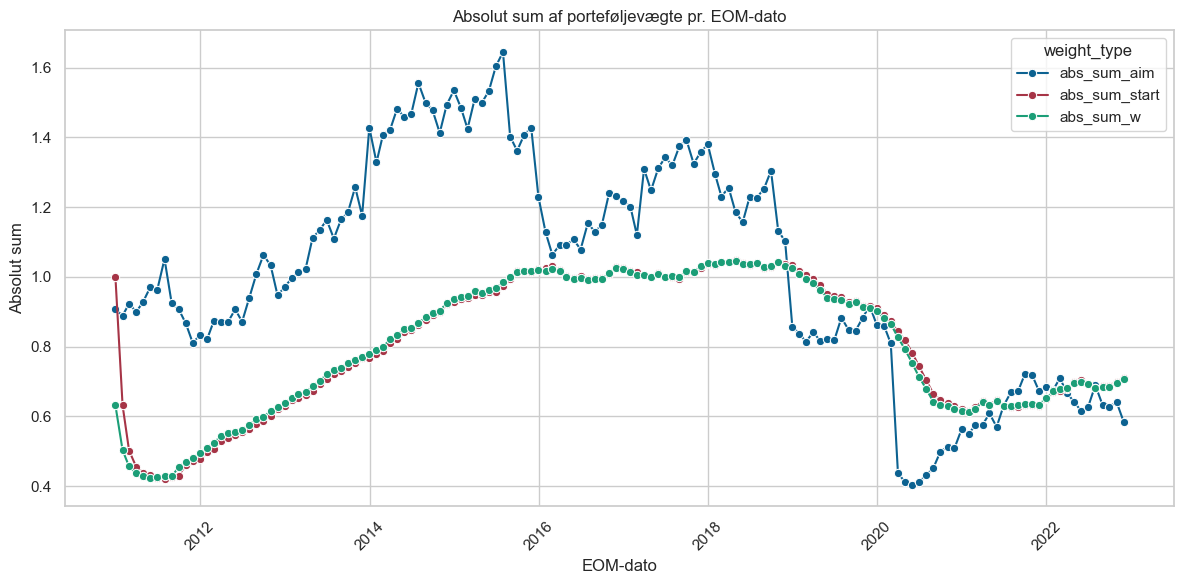

In [180]:
aims_df['eom'] = pd.to_datetime(aims_df['eom'])
w['eom'] = pd.to_datetime(w['eom'])

abs_sum_aim = aims_df.groupby('eom')['w_aim']\
    .apply(lambda x: x.abs().sum())\
    .reset_index(name='abs_sum_aim')

abs_sum_pfml = w.groupby('eom').agg(
    abs_sum_start = ('w_start', lambda x: x.abs().sum()),
    abs_sum_w     = ('w', lambda x: x.abs().sum())
).reset_index()


combined = pd.merge(abs_sum_aim, abs_sum_pfml, on='eom')

combined_long = combined.melt(id_vars='eom',
                              value_vars=['abs_sum_aim', 'abs_sum_start', 'abs_sum_w'],
                              var_name='weight_type',
                              value_name='abs_sum')

plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_long, x='eom', y='abs_sum', hue='weight_type', marker='o')
plt.title("Absolut sum af porteføljevægte pr. EOM-dato")
plt.xlabel("EOM-dato")
plt.ylabel("Absolut sum")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Check af pfml_w 2010 - 2013

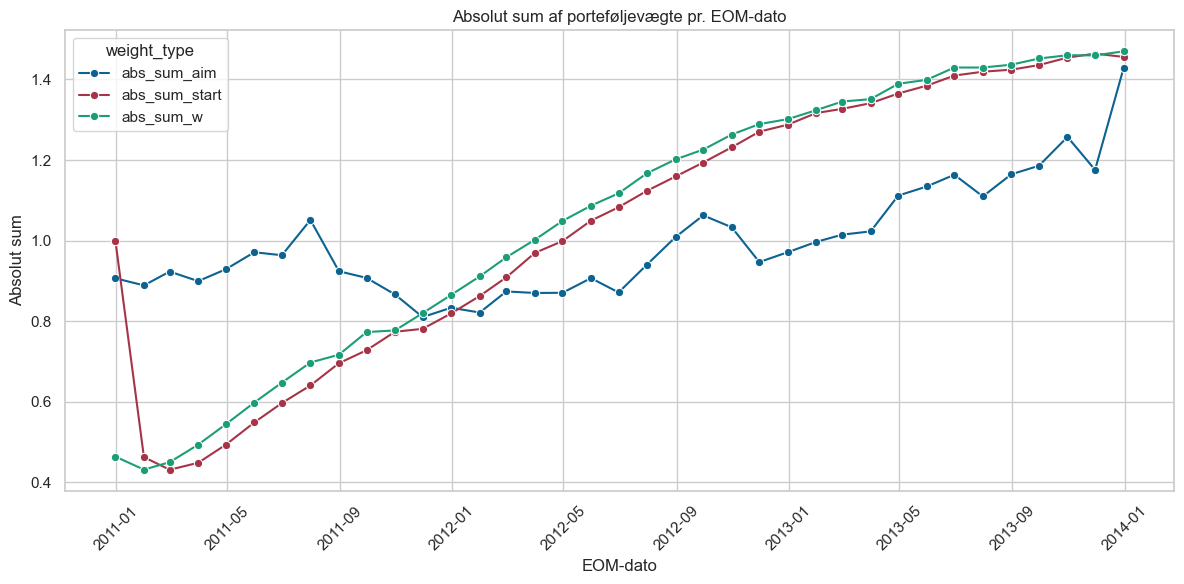

In [151]:
cutoff_date = pd.Timestamp("2013-12-31")
aims_df = aims_df[aims_df['eom'] <= cutoff_date]
w = w[w['eom'] <= cutoff_date]

aims_df['eom'] = pd.to_datetime(aims_df['eom'])
w['eom'] = pd.to_datetime(w['eom'])


abs_sum_aim = aims_df.groupby('eom')['w_aim']\
    .apply(lambda x: x.abs().sum())\
    .reset_index(name='abs_sum_aim')


abs_sum_pfml = w.groupby('eom').agg(
    abs_sum_start = ('w_start', lambda x: x.abs().sum()),
    abs_sum_w     = ('w', lambda x: x.abs().sum())
).reset_index()


combined = pd.merge(abs_sum_aim, abs_sum_pfml, on='eom')


combined_long = combined.melt(id_vars='eom',
                              value_vars=['abs_sum_aim', 'abs_sum_start', 'abs_sum_w'],
                              var_name='weight_type',
                              value_name='abs_sum')

plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_long, x='eom', y='abs_sum', hue='weight_type', marker='o')
plt.title("Absolut sum af porteføljevægte pr. EOM-dato")
plt.xlabel("EOM-dato")
plt.ylabel("Absolut sum")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [144]:
w

id        eom   w_start         w    tr_ld1    mu_ld1
0      10104 2010-12-31  0.019620  0.006397  0.024954  0.020052
1      10104 2011-01-31  0.006428 -0.000636  0.027140  0.038821
2      10104 2011-02-28 -0.000629 -0.004988  0.016218  0.003383
3      10104 2011-03-31 -0.005052 -0.007109  0.077442  0.027662
4      10104 2011-04-30 -0.007454 -0.009115 -0.048400 -0.015071
...      ...        ...       ...       ...       ...       ...
25752  92655 2013-08-31  0.028580  0.026941  0.002083  0.038329
25753  92655 2013-09-30  0.026000  0.025092 -0.046798  0.040602
25754  92655 2013-10-31  0.022984  0.022568  0.091090  0.028596
25755  92655 2013-11-30  0.023939  0.022758  0.014746  0.027672
25756  92655 2013-12-31  0.022471  0.021922 -0.040118 -0.033100

[6660 rows x 6 columns]

## Varierende gamma_rel

In [249]:
import pandas as pd
import numpy as np

results = []  # Liste til at gemme alle resultater

for gamma_val in range(1, 11):
    # Kald din pfml_w-funktion med gamma_rel = gamma_val
    w_data = data_tc[(data_tc['valid'] == True) & (data_tc['eom'].isin(dates_oos))]
    w_data = w_data[['id', 'eom', 'eom_ret', 'me', 'tr_ld1', 'valid']]
    
    # Beregn porteføljevægte for denne gamma_rel
    w = pfml_w(
        data=w_data,
        dates=dates_oos,
        cov_list=cov_list,
        lambda_list=lambda_list,
        gamma_rel=gamma_val,   # Vigtigste ændring
        iter=iter,
        risk_free=risk_free,
        wealth=wealth,
        mu=mu,
        aims=aims_df
    )
    
    # Sikrer, at id er integer i begge datasæt
    w_data['id'] = w_data['id'].astype(int)
    w['id'] = w['id'].astype(int)
    
    # Lav tidsserie-udregninger af porteføljeperformance
    pf = General_Functions.pf_ts_fun(w, data=data_tc, wealth=wealth, gam=gamma_val)
    pf['type'] = "Portfolio-ML"
 
    # Beregn dine ønskede nøgletal
    inv               = pf['inv'].mean()
    shorting          = pf['shorting'].mean()
    turnover_notional = pf['turnover'].mean()
    r_yearly          = np.mean(pf['r']) * 12
    std_yearly        = pf['r'].std() * np.sqrt(12)
    SR_gross_yearly   = (pf['r'].mean() / pf['r'].std()) * np.sqrt(12)
    tc_yearly         = pf['tc'].mean() * 12
    r_tc_yearly       = (pf['r'] - pf['tc']).mean() * 12
    SR_net_yearly     = ((pf['r'] - pf['tc']).mean() / pf['r'].std()) * np.sqrt(12)
    
    # Gem resultatet i en dictionary, som du kan konvertere til DataFrame bagefter
    results.append({
        'gamma_rel': gamma_val,
        'inv': inv,
        'shorting': shorting,
        'turnover': turnover_notional,
        'r_yearly': r_yearly,
        'std_yearly': std_yearly,
        'SR_gross_yearly': SR_gross_yearly,
        'tc_yearly': tc_yearly,
        'r_tc_yearly': r_tc_yearly,
        'SR_net_yearly': SR_net_yearly
    })

# Konverter resultaterne til en DataFrame
results_df = pd.DataFrame(results)
print(results_df)


m_func: n = 180

DEBUG: d=2010-12-31, next_month=2011-01-31, match=180 rækker
m_func: n = 180

DEBUG: d=2011-01-31, next_month=2011-02-28, match=180 rækker
m_func: n = 180

DEBUG: d=2011-02-28, next_month=2011-03-31, match=180 rækker
m_func: n = 180

DEBUG: d=2011-03-31, next_month=2011-04-30, match=180 rækker
m_func: n = 180

DEBUG: d=2011-04-30, next_month=2011-05-31, match=180 rækker
m_func: n = 180

DEBUG: d=2011-05-31, next_month=2011-06-30, match=180 rækker
m_func: n = 180

DEBUG: d=2011-06-30, next_month=2011-07-31, match=180 rækker
m_func: n = 180

DEBUG: d=2011-07-31, next_month=2011-08-31, match=180 rækker
m_func: n = 180

DEBUG: d=2011-08-31, next_month=2011-09-30, match=180 rækker
m_func: n = 180

DEBUG: d=2011-09-30, next_month=2011-10-31, match=180 rækker
m_func: n = 180

DEBUG: d=2011-10-31, next_month=2011-11-30, match=180 rækker
m_func: n = 180

DEBUG: d=2011-11-30, next_month=2011-12-31, match=180 rækker
m_func: n = 180

DEBUG: d=2011-12-31, next_month=2012-01-31, mat

In [250]:
results_df = pd.DataFrame(results)
#print(results_df)
display(results_df)

gamma_rel       inv  shorting  turnover  r_yearly  std_yearly  \
0          1  0.802493  0.269562  0.031552  0.042124    0.044731   
1          2  0.865077  0.303589  0.040493  0.040117    0.045394   
2          3  0.896543  0.320181  0.046987  0.038878    0.045722   
3          4  0.918350  0.331476  0.052585  0.038203    0.045895   
4          5  0.987951  0.367001  0.066783  0.038031    0.046365   
5          6  2.099857  0.911885  0.246572  0.034684    0.081774   
6          7  3.019937  1.348899  0.159688  0.032406    0.079085   
7          8  0.996377  0.375631  0.077067  0.038433    0.046981   
8          9  1.039707  0.391057  0.071722  0.036762    0.046630   
9         10  2.638945  1.166605  0.153518  0.031314    0.071505   

   SR_gross_yearly  tc_yearly  r_tc_yearly  SR_net_yearly  
0         0.941715   0.000206     0.041918       0.937105  
1         0.883744   0.000327     0.039790       0.876534  
2         0.850316   0.000431     0.038447       0.840893  
3         0.832400   0.000536     0.037667       0.820725  
4         0.820251   0.001559     0.036472       0.786629  
5         0.424143   0.229913    -0.195229      -2.387432  
6         0.409762   0.011391     0.021015       0.265731  
7         0.818053   0.002951     0.035483       0.755251  
8         0.788374   0.000980     0.035782       0.767350  
9         0.437925   0.008128     0.023186       0.324260

# Relevant plots og stats for Portfolio-ML (pfml)

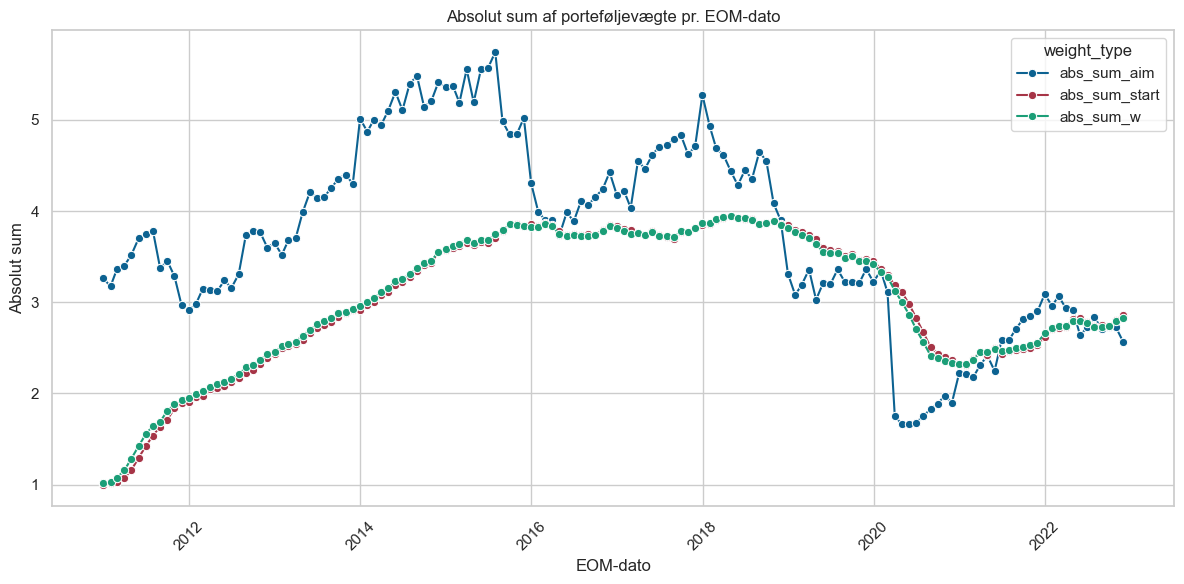

In [61]:
pfml['aims']['eom'] = pd.to_datetime(pfml['aims']['eom'])
pfml['w']['eom'] = pd.to_datetime(pfml['w']['eom'])


abs_sum_aim = pfml['aims'].groupby('eom')['w_aim']\
    .apply(lambda x: x.abs().sum())\
    .reset_index(name='abs_sum_aim')


abs_sum_pfml = pfml['w'].groupby('eom').agg(
    abs_sum_start = ('w_start', lambda x: x.abs().sum()),
    abs_sum_w     = ('w', lambda x: x.abs().sum())
).reset_index()


combined = pd.merge(abs_sum_aim, abs_sum_pfml, on='eom')


combined_long = combined.melt(id_vars='eom',
                              value_vars=['abs_sum_aim', 'abs_sum_start', 'abs_sum_w'],
                              var_name='weight_type',
                              value_name='abs_sum')

plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_long, x='eom', y='abs_sum', hue='weight_type', marker='o')
plt.title("Absolut sum af porteføljevægte pr. EOM-dato")
plt.xlabel("EOM-dato")
plt.ylabel("Absolut sum")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


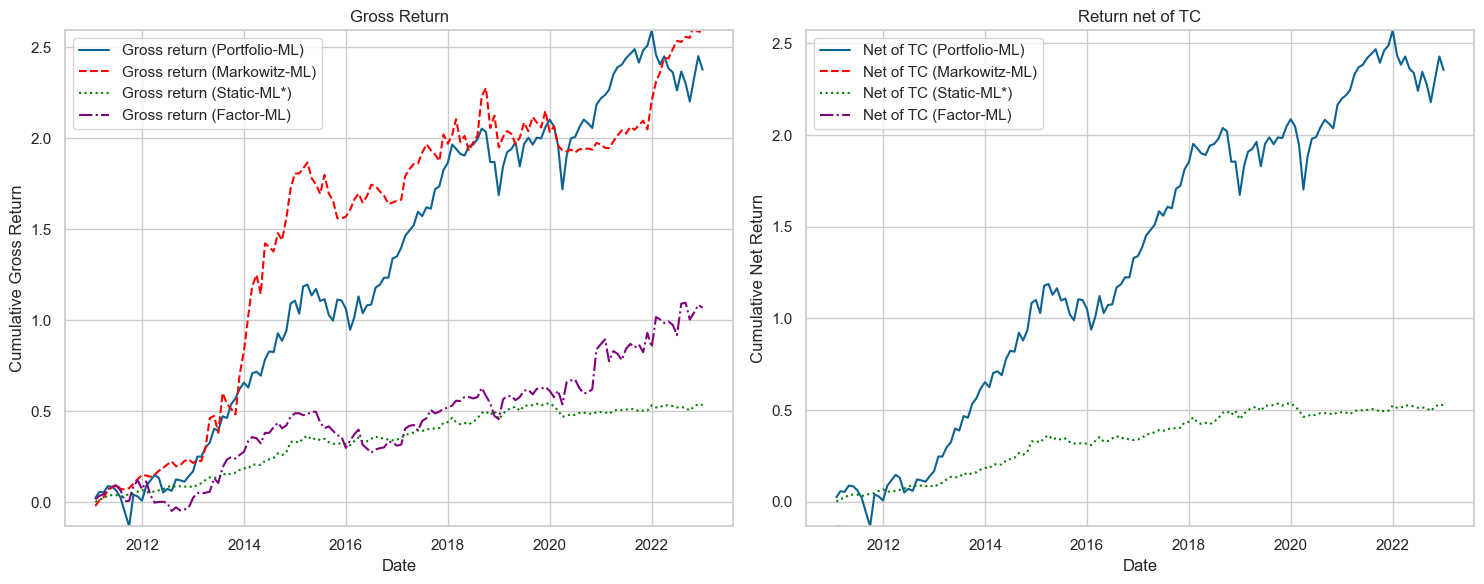

In [144]:
pfml_data = pfml["pf"].copy()
tpf_data = tpf["pf"].copy()
static_data = static["pf"].copy()
factor_data = factor_ml["pf"].copy()


pfml_data['cumret'] = pfml_data['r'].cumsum()
pfml_data['cumret_tc'] = (pfml_data['r'] - pfml_data['tc']).cumsum()


tpf_data['cumret'] = tpf_data['r'].cumsum()
tpf_data['cumret_tc'] = (tpf_data['r'] - tpf_data['tc']).cumsum()


static_data['cumret'] = static_data['r'].cumsum()
static_data['cumret_tc'] = (static_data['r'] - static_data['tc']).cumsum()


factor_data['cumret'] = factor_data['r'].cumsum()
factor_data['cumret_tc'] = (factor_data['r'] - factor_data['tc']).cumsum()


fig, axes = plt.subplots(1, 2, figsize=(15, 6))


ax = axes[0]
# Portfolio-ML
ax.plot(pfml_data['eom_ret'], pfml_data['cumret'], label='Gross return (Portfolio-ML)')
# Markowitz-ML
ax.plot(tpf_data['eom_ret'], tpf_data['cumret'], label='Gross return (Markowitz-ML)', color='red', linestyle='--')
# Static-ML*
ax.plot(static_data['eom_ret'], static_data['cumret'], label='Gross return (Static-ML*)', color='green', linestyle=':')
# Factor-ML
ax.plot(factor_data['eom_ret'], factor_data['cumret'], label='Gross return (Factor-ML)', color='purple', linestyle='-.')

y_min = pfml_data['cumret'].min()
y_max = pfml_data['cumret'].max()
ax.set_ylim(y_min, y_max)

ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Gross Return')
ax.set_title('Gross Return')
ax.grid(True)
ax.legend()

# --- Plot for Return net of TC ---
ax = axes[1]
# Portfolio-ML
ax.plot(pfml_data['eom_ret'], pfml_data['cumret_tc'], label='Net of TC (Portfolio-ML)')
# Markowitz-ML
ax.plot(tpf_data['eom_ret'], tpf_data['cumret_tc'], label='Net of TC (Markowitz-ML)', color='red', linestyle='--')
# Static-ML*
ax.plot(static_data['eom_ret'], static_data['cumret_tc'], label='Net of TC (Static-ML*)', color='green', linestyle=':')
# Factor-ML
ax.plot(factor_data['eom_ret'], factor_data['cumret_tc'], label='Net of TC (Factor-ML)', color='purple', linestyle='-.')
# Sæt y-aksens grænser ud fra Portfolio-ML
y_min_tc = pfml_data['cumret_tc'].min()
y_max_tc = pfml_data['cumret_tc'].max()
ax.set_ylim(y_min_tc, y_max_tc)

ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Net Return')
ax.set_title('Return net of TC')
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.show()


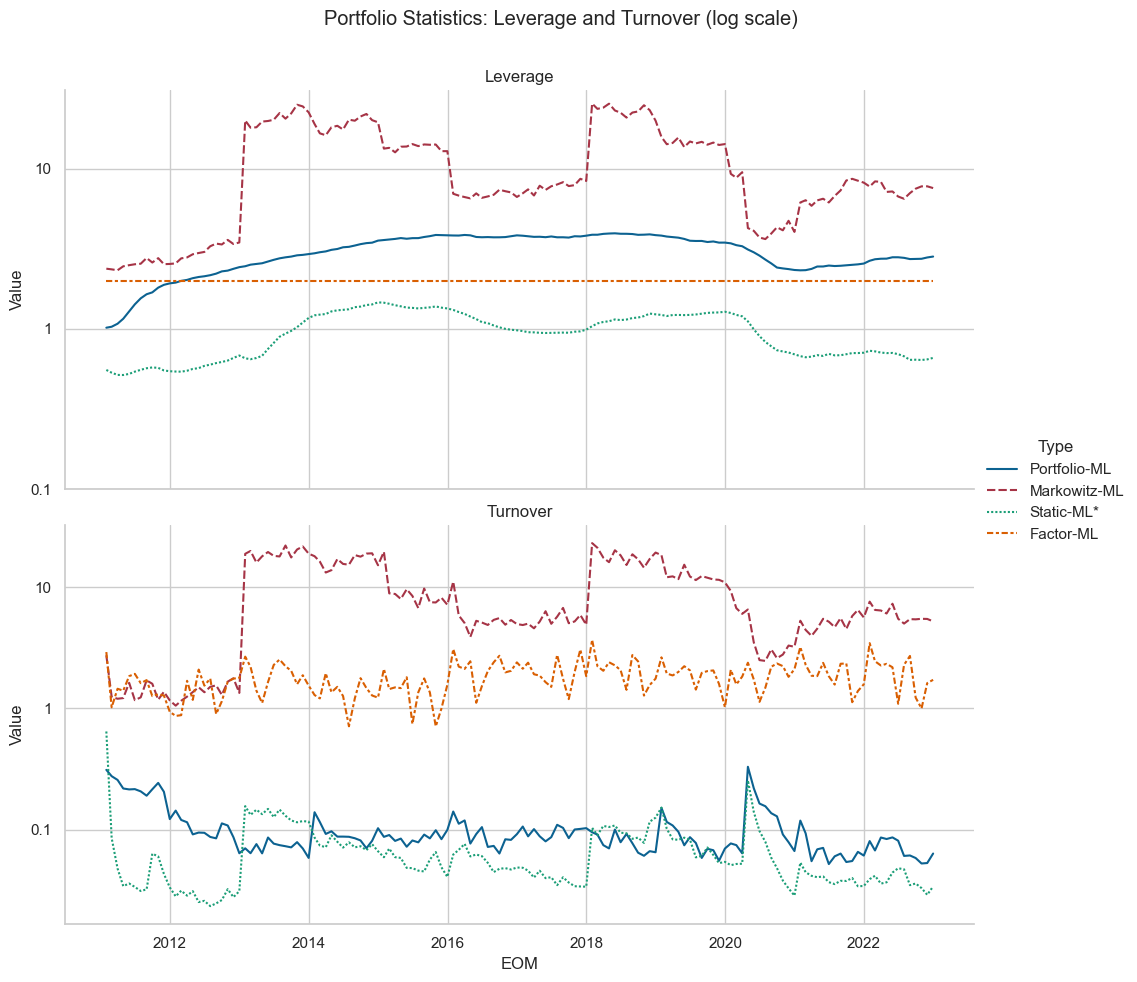

In [152]:
pfml_pf = pfml['pf'].copy()
tpf_pf = tpf['pf'].copy()
static_pf = static['pf'].copy()
factor_pf = factor_ml['pf'].copy()

pfml_pf["type"] = "Portfolio-ML"
tpf_pf["type"] = "Markowitz-ML"
static_pf["type"] = "Static-ML*"
factor_pf["type"] = "Factor-ML"

ws = pd.concat([
    pfml_pf[['eom_ret', 'inv', 'turnover', 'type']],
    tpf_pf[['eom_ret', 'inv', 'turnover', 'type']],
    static_pf[['eom_ret', 'inv', 'turnover', 'type']],
    factor_pf[['eom_ret', 'inv', 'turnover', 'type']]
], ignore_index=True)

ws.rename(columns={'eom_ret': 'eom'}, inplace=True)


ws_long = ws.melt(
    id_vars=['type', 'eom'],
    value_vars=['inv', 'turnover'],
    var_name='metric',
    value_name='value'
)

ws_long['metric'] = ws_long['metric'].map({
    'inv': 'Leverage',
    'turnover': 'Turnover'
})

main_types = ["Portfolio-ML", "Markowitz-ML", "Static-ML*", "Factor-ML"]
ws_long = ws_long[ws_long['type'].isin(main_types)]

g = sns.FacetGrid(ws_long, col="metric", col_wrap=1, sharey=False, height=5, aspect=2)
g.map_dataframe(sns.lineplot, x="eom", y="value", hue="type", style="type")


g.set(yscale="log")

g.set_titles("{col_name}")


g.add_legend(title="Type")


for ax in g.axes.flatten():
    ax.set_yticks([0.1, 1, 10])
    ax.set_yticklabels(['0.1', '1', '10'])


g.set_axis_labels("EOM", "Value")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Portfolio Statistics: Leverage and Turnover (log scale)")

plt.show()


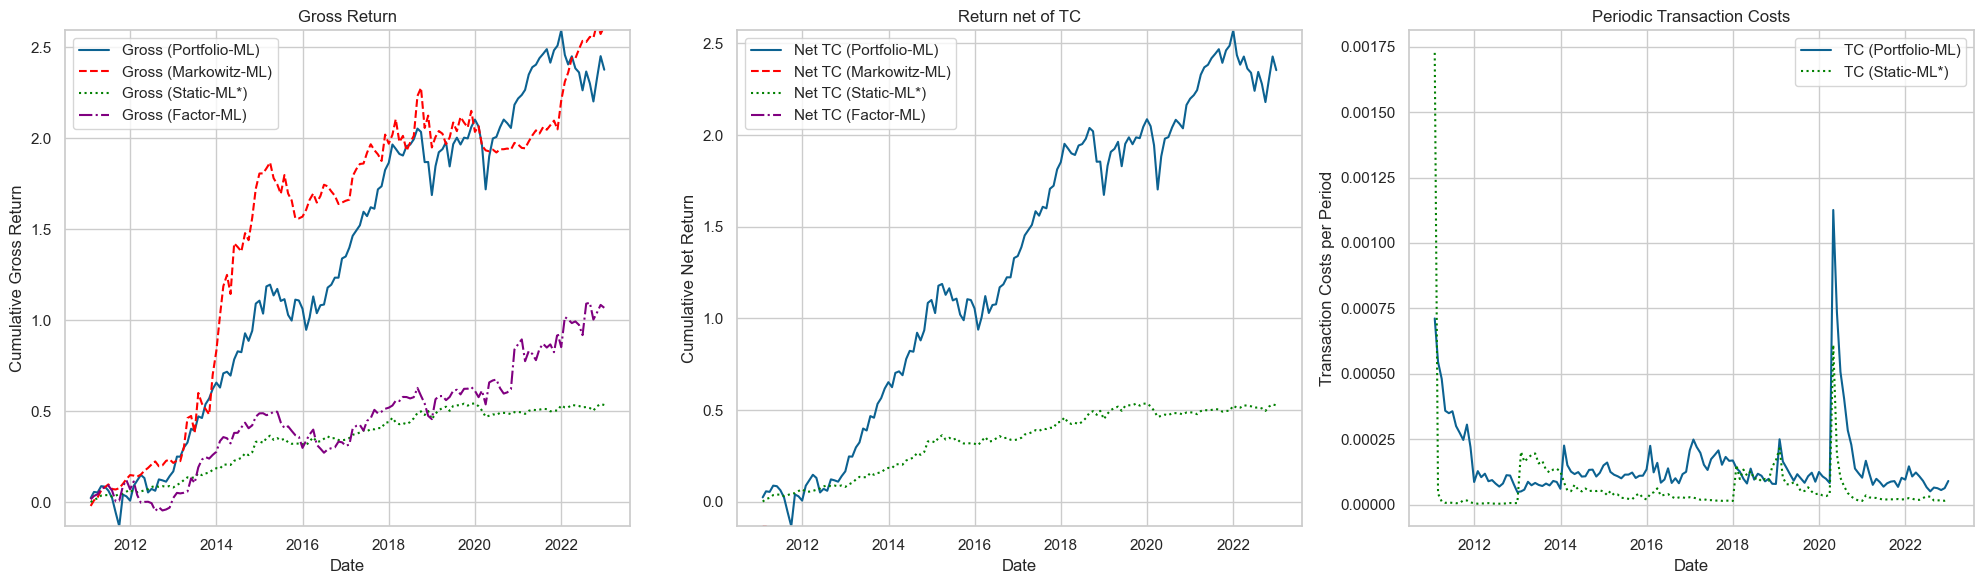

In [156]:
pfml_data = pfml["pf"].copy()
tpf_data = tpf["pf"].copy()
static_data = static["pf"].copy()
factor_data = factor_ml["pf"].copy()


pfml_data['cumret'] = pfml_data['r'].cumsum()
pfml_data['cumret_tc'] = (pfml_data['r'] - pfml_data['tc']).cumsum()

tpf_data['cumret'] = tpf_data['r'].cumsum()
tpf_data['cumret_tc'] = (tpf_data['r'] - tpf_data['tc']).cumsum()


static_data['cumret'] = static_data['r'].cumsum()
static_data['cumret_tc'] = (static_data['r'] - static_data['tc']).cumsum()


factor_data['cumret'] = factor_data['r'].cumsum()
factor_data['cumret_tc'] = (factor_data['r'] - factor_data['tc']).cumsum()


fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# --- Plot 1: Gross Return ---
ax = axes[0]
ax.plot(pfml_data['eom_ret'], pfml_data['cumret'], label='Gross (Portfolio-ML)')
ax.plot(tpf_data['eom_ret'], tpf_data['cumret'], label='Gross (Markowitz-ML)', 
        color='red', linestyle='--')
ax.plot(static_data['eom_ret'], static_data['cumret'], label='Gross (Static-ML*)', 
        color='green', linestyle=':')
ax.plot(factor_data['eom_ret'], factor_data['cumret'], label='Gross (Factor-ML)', 
        color='purple', linestyle='-.')
y_min = pfml_data['cumret'].min()
y_max = pfml_data['cumret'].max()
ax.set_ylim(y_min, y_max)
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Gross Return')
ax.set_title('Gross Return')
ax.grid(True)
ax.legend()

# --- Plot 2: Return net of TC ---
ax = axes[1]
ax.plot(pfml_data['eom_ret'], pfml_data['cumret_tc'], label='Net TC (Portfolio-ML)')
ax.plot(tpf_data['eom_ret'], tpf_data['cumret_tc'], label='Net TC (Markowitz-ML)', 
        color='red', linestyle='--')
ax.plot(static_data['eom_ret'], static_data['cumret_tc'], label='Net TC (Static-ML*)', 
        color='green', linestyle=':')
ax.plot(factor_data['eom_ret'], factor_data['cumret_tc'], label='Net TC (Factor-ML)', 
        color='purple', linestyle='-.')
y_min_tc = pfml_data['cumret_tc'].min()
y_max_tc = pfml_data['cumret_tc'].max()
ax.set_ylim(y_min_tc, y_max_tc)
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Net Return')
ax.set_title('Return net of TC')
ax.grid(True)
ax.legend()

# --- Plot 3: Periodiske Transaction Costs (kun Portfolio-ML og Static-ML*) ---
ax = axes[2]
ax.plot(pfml_data['eom_ret'], pfml_data['tc'], label='TC (Portfolio-ML)')
ax.plot(static_data['eom_ret'], static_data['tc'], label='TC (Static-ML*)', 
        color='green', linestyle=':')
ax.set_xlabel('Date')
ax.set_ylabel('Transaction Costs per Period')
ax.set_title('Periodic Transaction Costs')
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.show()


In [128]:
display(pf_summary)

type    n        inv  shorting  turnover_notional         r  \
0      Portfolio-ML  144   3.029671  0.814628           0.099722  0.198039   
1         Static-ML  144   4.225897  1.742836           0.145632  0.095125   
2        Static-ML*  144   0.955967  0.304393           0.067874  0.044620   
3      Markowitz-ML  144  10.953368  5.048301           8.776867  0.217868   
4         Factor-ML  144   2.000000  1.000000           1.823863  0.089088   
5           Rank-ML  144   2.000000  1.000000           0.987215  0.047434   
6  Minimum Variance  144   2.280726  0.640363           1.142763  0.108365   
7               1/N  144   1.000000  0.000000           0.052444  0.129325   
8            Market  144   1.000000  0.000000           0.008496  0.120273   

         sd  sr_gross         tc       r_tc          sr        obj  
0  0.242310  0.817298   0.001830   0.196210    0.809748  -0.097360  
1  0.127910  0.743682   0.003174   0.091950    0.718866   0.010145  
2  0.047281  0.943727   0.000810   0.043810    0.926586   0.032632  
3  0.251235  0.867189  50.583412 -50.365544 -200.471870 -50.681139  
4  0.161915  0.550212   2.586110  -2.497022  -15.421821  -2.628104  
5  0.086572  0.547911   0.451931  -0.404497   -4.672365  -0.441971  
6  0.121299  0.893375   0.601862  -0.493497   -4.068447  -0.567064  
7  0.158812  0.814327   0.001649   0.127676    0.803943   0.001570  
8  0.143452  0.838420   0.000031   0.120242    0.838207   0.017350

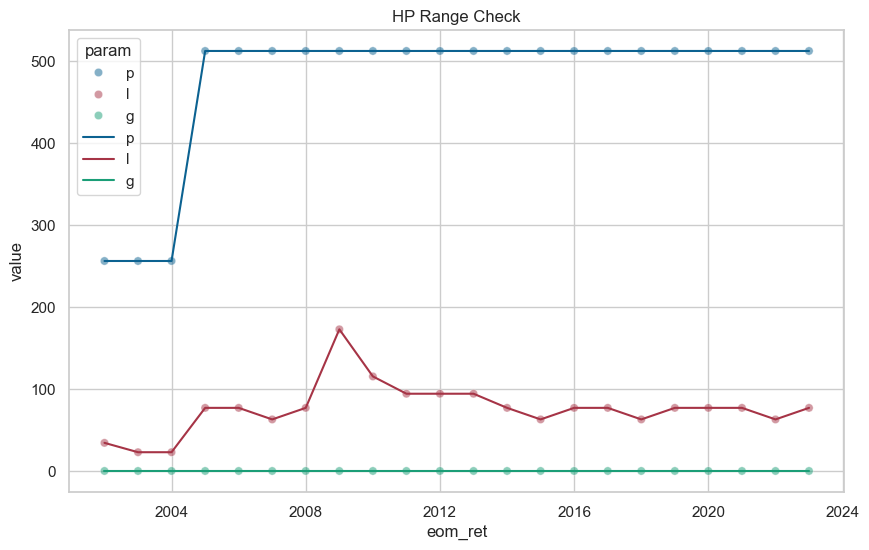

In [163]:
melt_df = pfml['best_hps'].melt(id_vars=['eom_ret'], value_vars=['p', 'l', 'g'], var_name='param', value_name='value')
plt.figure(figsize=(10,6))
sns.scatterplot(data=melt_df, x='eom_ret', y='value', hue='param', alpha=0.5)
sns.lineplot(data=melt_df, x='eom_ret', y='value', hue='param')
plt.title("HP Range Check")
plt.show()

         eom    mu_ld1    tr_ld1  update_factor
0 1982-12-31  0.041776 -0.033818       0.927437
1 1982-12-31  0.041776  0.012441       0.971841
2 1982-12-31  0.041776  0.090745       1.047005
3 1982-12-31  0.041776  0.027109       0.985920
4 1982-12-31  0.041776  0.070947       1.028001


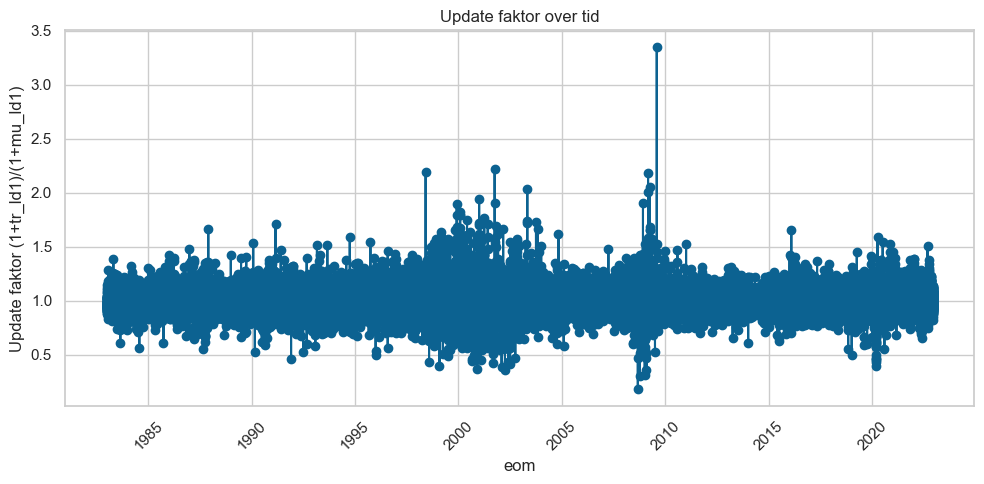

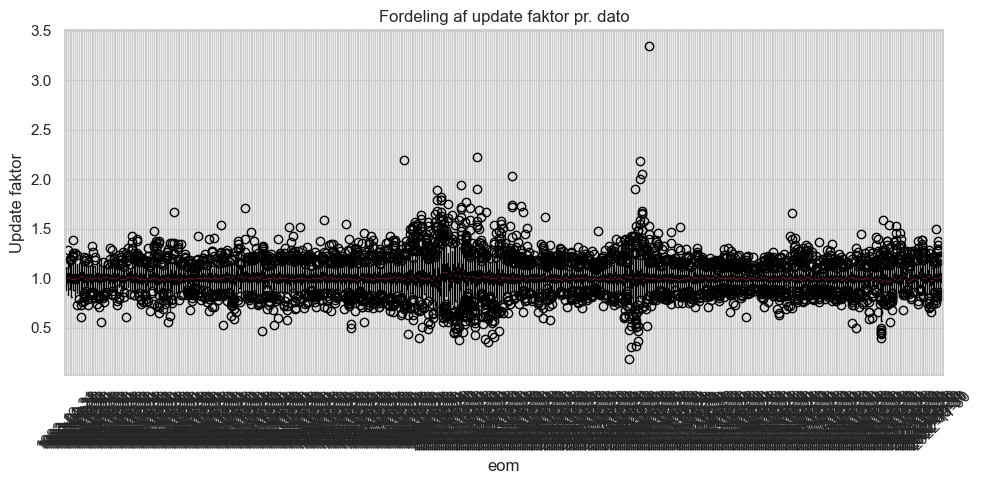

In [179]:
wealth['eom'] = pd.to_datetime(wealth['eom'])
data_tc['eom'] = pd.to_datetime(data_tc['eom'])

df_inputs = pd.merge(wealth[['eom', 'mu_ld1']], data_tc[['eom', 'tr_ld1']], on='eom', how='inner')

df_inputs['update_factor'] = (1 + df_inputs['tr_ld1']) / (1 + df_inputs['mu_ld1'])

print(df_inputs.head())

plt.figure(figsize=(10, 5))
plt.plot(df_inputs['eom'], df_inputs['update_factor'], marker='o', linestyle='-')
plt.xlabel('eom')
plt.ylabel('Update faktor (1+tr_ld1)/(1+mu_ld1)')
plt.title('Update faktor over tid')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


grouped = df_inputs.groupby('eom')['update_factor']
data_to_plot = [group for name, group in grouped]

plt.figure(figsize=(10, 5))
plt.boxplot(data_to_plot, labels=[name.strftime('%Y-%m-%d') for name, group in grouped])
plt.xlabel('eom')
plt.ylabel('Update faktor')
plt.title('Fordeling af update faktor pr. dato')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
